In [1]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso 
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap
from regain.hmm.utils import cross_validation,spread_pred_interpretation
from regain.hmm.utils_pred import Value_from_returns,thetas_comparison
import pickle as pkl
from notebooks.hmm.pred_func import pred_regression_methods
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [4]:
N_samples = 1000
N_states = 5
N_TS = 10
sigma_Normal = 1

dataset = generate_hmm(n_samples= N_samples,
                       n_states=N_states,
                       n_dim_obs=N_TS,
                       mode_precisions='regain',
                       mode_mean = 'Normal',
                       transition_type='fixed',
                       sigma=sigma_Normal)
N_pred = 10

[1004.38921109 1009.74570831 1003.37283719 1006.56277515 1005.67399625
 1000.56329581 1002.97784004 1003.46470268 1008.08755636 1004.58976454]


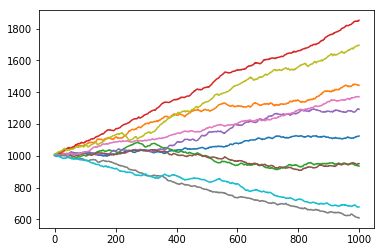

In [5]:
p_vec_0 = np.random.uniform(0,10,N_TS)+1000
Data = np.zeros((np.size(dataset['data'],axis=0),N_TS))
print(p_vec_0)
for j in range(N_TS):
    #print(p_vec_0[j])
    #print(np.cumsum(dataset['data'][:,j]))
    plt.plot(p_vec_0[j]+np.cumsum(dataset['data'][:,j]))
    Data[:,j] = p_vec_0[j]+np.cumsum(dataset['data'][:,j])
    
plt.show()

[1]	valid_0's l2: 2.1774	valid_0's l1: 1.25687
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 2.12609	valid_0's l1: 1.23859
[3]	valid_0's l2: 2.1367	valid_0's l1: 1.24278
[4]	valid_0's l2: 2.08982	valid_0's l1: 1.2289
[5]	valid_0's l2: 2.06316	valid_0's l1: 1.22117
[6]	valid_0's l2: 2.01289	valid_0's l1: 1.21288
[7]	valid_0's l2: 1.9672	valid_0's l1: 1.20451
[8]	valid_0's l2: 1.93803	valid_0's l1: 1.19599
[9]	valid_0's l2: 1.93021	valid_0's l1: 1.19659
[10]	valid_0's l2: 1.94419	valid_0's l1: 1.19761
[11]	valid_0's l2: 1.96353	valid_0's l1: 1.19782
[12]	valid_0's l2: 1.95216	valid_0's l1: 1.20391
[13]	valid_0's l2: 1.96008	valid_0's l1: 1.20395
[14]	valid_0's l2: 1.96009	valid_0's l1: 1.19635
[15]	valid_0's l2: 1.95396	valid_0's l1: 1.19428
[16]	valid_0's l2: 1.91954	valid_0's l1: 1.18254
[17]	valid_0's l2: 1.92803	valid_0's l1: 1.17578
[18]	valid_0's l2: 1.93692	valid_0's l1: 1.17875
[19]	valid_0's l2: 1.93966	valid_0's l1: 1.17939
[20]	valid_0's l2: 1.

[3]	valid_0's l2: 0.758888	valid_0's l1: 0.700519
[4]	valid_0's l2: 0.767773	valid_0's l1: 0.712856
[5]	valid_0's l2: 0.775692	valid_0's l1: 0.717847
[6]	valid_0's l2: 0.787009	valid_0's l1: 0.722914
[7]	valid_0's l2: 0.814901	valid_0's l1: 0.733885
[8]	valid_0's l2: 0.820931	valid_0's l1: 0.740498
[9]	valid_0's l2: 0.830851	valid_0's l1: 0.736555
[10]	valid_0's l2: 0.820995	valid_0's l1: 0.738961
[11]	valid_0's l2: 0.800644	valid_0's l1: 0.725446
Early stopping, best iteration is:
[1]	valid_0's l2: 0.749372	valid_0's l1: 0.695722
[1]	valid_0's l2: 2.10077	valid_0's l1: 1.10598
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 2.05313	valid_0's l1: 1.09752
[3]	valid_0's l2: 2.02219	valid_0's l1: 1.09642
[4]	valid_0's l2: 1.97385	valid_0's l1: 1.09322
[5]	valid_0's l2: 1.98857	valid_0's l1: 1.10875
[6]	valid_0's l2: 1.99548	valid_0's l1: 1.11225
[7]	valid_0's l2: 1.9645	valid_0's l1: 1.11026
[8]	valid_0's l2: 1.93038	valid_0's l1: 1.10812
[9]	valid_0's l2: 1

[20]	valid_0's l2: 1.20379	valid_0's l1: 0.878627
[21]	valid_0's l2: 1.21367	valid_0's l1: 0.881013
[22]	valid_0's l2: 1.21342	valid_0's l1: 0.883137
[23]	valid_0's l2: 1.19128	valid_0's l1: 0.87824
[24]	valid_0's l2: 1.19308	valid_0's l1: 0.882291
Early stopping, best iteration is:
[14]	valid_0's l2: 1.17833	valid_0's l1: 0.880545
[1]	valid_0's l2: 1.48632	valid_0's l1: 0.906754
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.41736	valid_0's l1: 0.882309
[3]	valid_0's l2: 1.42039	valid_0's l1: 0.889456
[4]	valid_0's l2: 1.37545	valid_0's l1: 0.874101
[5]	valid_0's l2: 1.35072	valid_0's l1: 0.873036
[6]	valid_0's l2: 1.37056	valid_0's l1: 0.868175
[7]	valid_0's l2: 1.38559	valid_0's l1: 0.875219
[8]	valid_0's l2: 1.38882	valid_0's l1: 0.8831
[9]	valid_0's l2: 1.38722	valid_0's l1: 0.883033
[10]	valid_0's l2: 1.39667	valid_0's l1: 0.883959
[11]	valid_0's l2: 1.40326	valid_0's l1: 0.886263
[12]	valid_0's l2: 1.3639	valid_0's l1: 0.883176
[13]	valid_0's l2

[21]	valid_0's l2: 1.95212	valid_0's l1: 0.906972
Early stopping, best iteration is:
[11]	valid_0's l2: 1.84301	valid_0's l1: 0.872202
[1]	valid_0's l2: 2.54594	valid_0's l1: 1.44264
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 2.55136	valid_0's l1: 1.45246
[3]	valid_0's l2: 2.53629	valid_0's l1: 1.45563
[4]	valid_0's l2: 2.52085	valid_0's l1: 1.45409
[5]	valid_0's l2: 2.50415	valid_0's l1: 1.44549
[6]	valid_0's l2: 2.44317	valid_0's l1: 1.42118
[7]	valid_0's l2: 2.39816	valid_0's l1: 1.4127
[8]	valid_0's l2: 2.41021	valid_0's l1: 1.41122
[9]	valid_0's l2: 2.36799	valid_0's l1: 1.40024
[10]	valid_0's l2: 2.3369	valid_0's l1: 1.39347
[11]	valid_0's l2: 2.33474	valid_0's l1: 1.39049
[12]	valid_0's l2: 2.36289	valid_0's l1: 1.39898
[13]	valid_0's l2: 2.37734	valid_0's l1: 1.40291
[14]	valid_0's l2: 2.37968	valid_0's l1: 1.40129
[15]	valid_0's l2: 2.3231	valid_0's l1: 1.38722
[16]	valid_0's l2: 2.32597	valid_0's l1: 1.38659
[17]	valid_0's l2: 2.30092	valid

[10]	valid_0's l2: 2.2089	valid_0's l1: 1.28207
[11]	valid_0's l2: 2.1595	valid_0's l1: 1.27529
[12]	valid_0's l2: 2.13928	valid_0's l1: 1.26445
[13]	valid_0's l2: 2.09123	valid_0's l1: 1.25003
[14]	valid_0's l2: 2.09851	valid_0's l1: 1.24875
[15]	valid_0's l2: 2.09491	valid_0's l1: 1.24914
[16]	valid_0's l2: 2.07402	valid_0's l1: 1.2383
[17]	valid_0's l2: 2.04976	valid_0's l1: 1.22788
[18]	valid_0's l2: 2.01751	valid_0's l1: 1.21694
[19]	valid_0's l2: 2.00927	valid_0's l1: 1.21087
[20]	valid_0's l2: 1.95061	valid_0's l1: 1.19222
[21]	valid_0's l2: 1.93725	valid_0's l1: 1.19571
[22]	valid_0's l2: 1.93082	valid_0's l1: 1.19246
[23]	valid_0's l2: 1.94375	valid_0's l1: 1.19989
[24]	valid_0's l2: 1.95834	valid_0's l1: 1.20067
[25]	valid_0's l2: 1.94203	valid_0's l1: 1.19306
[26]	valid_0's l2: 1.97724	valid_0's l1: 1.20518
[27]	valid_0's l2: 1.95682	valid_0's l1: 1.19829
[28]	valid_0's l2: 1.92026	valid_0's l1: 1.1881
[29]	valid_0's l2: 1.87297	valid_0's l1: 1.17958
[30]	valid_0's l2: 1.860

[23]	valid_0's l2: 1.81263	valid_0's l1: 1.11554
[24]	valid_0's l2: 1.79485	valid_0's l1: 1.10976
Early stopping, best iteration is:
[14]	valid_0's l2: 1.78214	valid_0's l1: 1.10391
[1]	valid_0's l2: 1.24996	valid_0's l1: 0.963089
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.22413	valid_0's l1: 0.939587
[3]	valid_0's l2: 1.23763	valid_0's l1: 0.938243
[4]	valid_0's l2: 1.22232	valid_0's l1: 0.920026
[5]	valid_0's l2: 1.20514	valid_0's l1: 0.903029
[6]	valid_0's l2: 1.19995	valid_0's l1: 0.886845
[7]	valid_0's l2: 1.1908	valid_0's l1: 0.86905
[8]	valid_0's l2: 1.20354	valid_0's l1: 0.868954
[9]	valid_0's l2: 1.19127	valid_0's l1: 0.852783
[10]	valid_0's l2: 1.18794	valid_0's l1: 0.845019
[11]	valid_0's l2: 1.182	valid_0's l1: 0.829982
[12]	valid_0's l2: 1.16623	valid_0's l1: 0.814359
[13]	valid_0's l2: 1.14074	valid_0's l1: 0.791739
[14]	valid_0's l2: 1.1261	valid_0's l1: 0.77979
[15]	valid_0's l2: 1.14262	valid_0's l1: 0.780998
[16]	valid_0's l2: 1.1

[1]	valid_0's l2: 0.777759	valid_0's l1: 0.724196
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 0.757304	valid_0's l1: 0.710018
[3]	valid_0's l2: 0.740543	valid_0's l1: 0.702561
[4]	valid_0's l2: 0.748895	valid_0's l1: 0.713668
[5]	valid_0's l2: 0.767187	valid_0's l1: 0.719453
[6]	valid_0's l2: 0.786563	valid_0's l1: 0.724818
[7]	valid_0's l2: 0.783988	valid_0's l1: 0.723805
[8]	valid_0's l2: 0.774634	valid_0's l1: 0.717805
[9]	valid_0's l2: 0.771917	valid_0's l1: 0.711525
[10]	valid_0's l2: 0.765966	valid_0's l1: 0.707902
[11]	valid_0's l2: 0.758195	valid_0's l1: 0.700121
[12]	valid_0's l2: 0.755901	valid_0's l1: 0.692395
[13]	valid_0's l2: 0.772703	valid_0's l1: 0.706553
Early stopping, best iteration is:
[3]	valid_0's l2: 0.740543	valid_0's l1: 0.702561
[1]	valid_0's l2: 1.63542	valid_0's l1: 0.877917
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.59398	valid_0's l1: 0.872925
[3]	valid_0's l2: 1.5908	valid_0's l1: 0.

[11]	valid_0's l2: 1.11658	valid_0's l1: 0.811278
[12]	valid_0's l2: 1.1192	valid_0's l1: 0.812216
[13]	valid_0's l2: 1.12994	valid_0's l1: 0.816208
[14]	valid_0's l2: 1.14469	valid_0's l1: 0.827175
[15]	valid_0's l2: 1.16534	valid_0's l1: 0.829211
[16]	valid_0's l2: 1.15999	valid_0's l1: 0.833756
[17]	valid_0's l2: 1.15857	valid_0's l1: 0.836663
[18]	valid_0's l2: 1.14713	valid_0's l1: 0.840203
[19]	valid_0's l2: 1.16433	valid_0's l1: 0.849102
[20]	valid_0's l2: 1.17125	valid_0's l1: 0.855912
[21]	valid_0's l2: 1.17443	valid_0's l1: 0.870381
Early stopping, best iteration is:
[11]	valid_0's l2: 1.11658	valid_0's l1: 0.811278
[1]	valid_0's l2: 2.95669	valid_0's l1: 1.4968
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 2.8308	valid_0's l1: 1.46218
[3]	valid_0's l2: 2.72032	valid_0's l1: 1.43319
[4]	valid_0's l2: 2.64165	valid_0's l1: 1.41049
[5]	valid_0's l2: 2.55106	valid_0's l1: 1.37988
[6]	valid_0's l2: 2.42014	valid_0's l1: 1.3516
[7]	valid_0's l2: 2.

[5]	valid_0's l2: 1.87162	valid_0's l1: 1.21087
[6]	valid_0's l2: 1.83943	valid_0's l1: 1.20399
[7]	valid_0's l2: 1.81213	valid_0's l1: 1.19969
[8]	valid_0's l2: 1.79	valid_0's l1: 1.19263
[9]	valid_0's l2: 1.75188	valid_0's l1: 1.18577
[10]	valid_0's l2: 1.72815	valid_0's l1: 1.18016
[11]	valid_0's l2: 1.71127	valid_0's l1: 1.1769
[12]	valid_0's l2: 1.68017	valid_0's l1: 1.16754
[13]	valid_0's l2: 1.67393	valid_0's l1: 1.17178
[14]	valid_0's l2: 1.64877	valid_0's l1: 1.16565
[15]	valid_0's l2: 1.65479	valid_0's l1: 1.1685
[16]	valid_0's l2: 1.64813	valid_0's l1: 1.16702
[17]	valid_0's l2: 1.66364	valid_0's l1: 1.17341
[18]	valid_0's l2: 1.63285	valid_0's l1: 1.16692
[19]	valid_0's l2: 1.61878	valid_0's l1: 1.16513
[20]	valid_0's l2: 1.61239	valid_0's l1: 1.16379
[21]	valid_0's l2: 1.61279	valid_0's l1: 1.16019
[22]	valid_0's l2: 1.5921	valid_0's l1: 1.15519
[23]	valid_0's l2: 1.57613	valid_0's l1: 1.14873
[24]	valid_0's l2: 1.53274	valid_0's l1: 1.13114
[25]	valid_0's l2: 1.53318	vali

[1]	valid_0's l2: 2.78982	valid_0's l1: 1.44057
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 2.66641	valid_0's l1: 1.40487
[3]	valid_0's l2: 2.52695	valid_0's l1: 1.36009
[4]	valid_0's l2: 2.41356	valid_0's l1: 1.31816
[5]	valid_0's l2: 2.30702	valid_0's l1: 1.28035
[6]	valid_0's l2: 2.18804	valid_0's l1: 1.255
[7]	valid_0's l2: 2.12186	valid_0's l1: 1.22963
[8]	valid_0's l2: 2.07362	valid_0's l1: 1.20963
[9]	valid_0's l2: 1.99585	valid_0's l1: 1.19104
[10]	valid_0's l2: 1.96371	valid_0's l1: 1.17881
[11]	valid_0's l2: 1.9265	valid_0's l1: 1.17139
[12]	valid_0's l2: 1.86517	valid_0's l1: 1.14451
[13]	valid_0's l2: 1.83598	valid_0's l1: 1.12882
[14]	valid_0's l2: 1.78189	valid_0's l1: 1.11242
[15]	valid_0's l2: 1.74048	valid_0's l1: 1.09609
[16]	valid_0's l2: 1.70588	valid_0's l1: 1.07761
[17]	valid_0's l2: 1.66784	valid_0's l1: 1.06468
[18]	valid_0's l2: 1.64653	valid_0's l1: 1.05278
[19]	valid_0's l2: 1.64071	valid_0's l1: 1.04643
[20]	valid_0's l2: 1

[39]	valid_0's l2: 1.3888	valid_0's l1: 1.08459
[40]	valid_0's l2: 1.37743	valid_0's l1: 1.08247
[41]	valid_0's l2: 1.36823	valid_0's l1: 1.08497
[42]	valid_0's l2: 1.37174	valid_0's l1: 1.0879
[43]	valid_0's l2: 1.36345	valid_0's l1: 1.08843
[44]	valid_0's l2: 1.35363	valid_0's l1: 1.08754
[45]	valid_0's l2: 1.35026	valid_0's l1: 1.08723
[46]	valid_0's l2: 1.34305	valid_0's l1: 1.0812
[47]	valid_0's l2: 1.33656	valid_0's l1: 1.07462
[48]	valid_0's l2: 1.32423	valid_0's l1: 1.06883
[49]	valid_0's l2: 1.30631	valid_0's l1: 1.0621
[50]	valid_0's l2: 1.27466	valid_0's l1: 1.04975
[51]	valid_0's l2: 1.25256	valid_0's l1: 1.03865
[52]	valid_0's l2: 1.24854	valid_0's l1: 1.03822
[53]	valid_0's l2: 1.24263	valid_0's l1: 1.03816
[54]	valid_0's l2: 1.23793	valid_0's l1: 1.03629
[55]	valid_0's l2: 1.22004	valid_0's l1: 1.02727
[56]	valid_0's l2: 1.22374	valid_0's l1: 1.02726
[57]	valid_0's l2: 1.23313	valid_0's l1: 1.03192
[58]	valid_0's l2: 1.22794	valid_0's l1: 1.03016
[59]	valid_0's l2: 1.233

[34]	valid_0's l2: 2.14657	valid_0's l1: 1.16329
[35]	valid_0's l2: 2.0949	valid_0's l1: 1.14493
[36]	valid_0's l2: 2.04679	valid_0's l1: 1.13247
[37]	valid_0's l2: 2.03551	valid_0's l1: 1.13303
[38]	valid_0's l2: 1.98879	valid_0's l1: 1.11709
[39]	valid_0's l2: 1.96034	valid_0's l1: 1.10998
[40]	valid_0's l2: 1.93864	valid_0's l1: 1.10167
[41]	valid_0's l2: 1.94247	valid_0's l1: 1.09683
[42]	valid_0's l2: 1.95025	valid_0's l1: 1.09816
[43]	valid_0's l2: 1.93144	valid_0's l1: 1.08802
[44]	valid_0's l2: 1.95011	valid_0's l1: 1.09182
[45]	valid_0's l2: 1.9365	valid_0's l1: 1.0858
[46]	valid_0's l2: 1.91138	valid_0's l1: 1.07926
[47]	valid_0's l2: 1.92683	valid_0's l1: 1.07551
[48]	valid_0's l2: 1.90229	valid_0's l1: 1.06908
[49]	valid_0's l2: 1.88169	valid_0's l1: 1.06355
[50]	valid_0's l2: 1.86609	valid_0's l1: 1.06145
[51]	valid_0's l2: 1.85322	valid_0's l1: 1.05992
[52]	valid_0's l2: 1.82822	valid_0's l1: 1.05469
[53]	valid_0's l2: 1.81672	valid_0's l1: 1.05591
[54]	valid_0's l2: 1.79

[53]	valid_0's l2: 1.3126	valid_0's l1: 1.03403
[54]	valid_0's l2: 1.29391	valid_0's l1: 1.02461
[55]	valid_0's l2: 1.29379	valid_0's l1: 1.02456
[56]	valid_0's l2: 1.27039	valid_0's l1: 1.01658
[57]	valid_0's l2: 1.25895	valid_0's l1: 1.01483
[58]	valid_0's l2: 1.27688	valid_0's l1: 1.02431
[59]	valid_0's l2: 1.28926	valid_0's l1: 1.03001
[60]	valid_0's l2: 1.29281	valid_0's l1: 1.03047
[61]	valid_0's l2: 1.29974	valid_0's l1: 1.03116
[62]	valid_0's l2: 1.30734	valid_0's l1: 1.03209
[63]	valid_0's l2: 1.30852	valid_0's l1: 1.03185
[64]	valid_0's l2: 1.33134	valid_0's l1: 1.04279
[65]	valid_0's l2: 1.33311	valid_0's l1: 1.0406
[66]	valid_0's l2: 1.32833	valid_0's l1: 1.03742
[67]	valid_0's l2: 1.31707	valid_0's l1: 1.03749
Early stopping, best iteration is:
[57]	valid_0's l2: 1.25895	valid_0's l1: 1.01483
[1]	valid_0's l2: 1.19678	valid_0's l1: 0.879508
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.21349	valid_0's l1: 0.889499
[3]	valid_0's l2: 1.1927

[20]	valid_0's l2: 3.2062	valid_0's l1: 1.49582
[21]	valid_0's l2: 3.13644	valid_0's l1: 1.47573
[22]	valid_0's l2: 3.09199	valid_0's l1: 1.46778
[23]	valid_0's l2: 3.09821	valid_0's l1: 1.46652
[24]	valid_0's l2: 3.10577	valid_0's l1: 1.47239
[25]	valid_0's l2: 3.07276	valid_0's l1: 1.45986
[26]	valid_0's l2: 3.04838	valid_0's l1: 1.45368
[27]	valid_0's l2: 3.03563	valid_0's l1: 1.44916
[28]	valid_0's l2: 3.00398	valid_0's l1: 1.44528
[29]	valid_0's l2: 3.00935	valid_0's l1: 1.44769
[30]	valid_0's l2: 2.973	valid_0's l1: 1.43667
[31]	valid_0's l2: 2.95826	valid_0's l1: 1.42764
[32]	valid_0's l2: 2.95046	valid_0's l1: 1.42204
[33]	valid_0's l2: 2.91249	valid_0's l1: 1.41207
[34]	valid_0's l2: 2.92125	valid_0's l1: 1.42031
[35]	valid_0's l2: 2.8556	valid_0's l1: 1.39506
[36]	valid_0's l2: 2.83615	valid_0's l1: 1.3901
[37]	valid_0's l2: 2.78108	valid_0's l1: 1.37503
[38]	valid_0's l2: 2.75264	valid_0's l1: 1.36954
[39]	valid_0's l2: 2.72778	valid_0's l1: 1.36317
[40]	valid_0's l2: 2.6982

[59]	valid_0's l2: 1.26632	valid_0's l1: 0.997897
[60]	valid_0's l2: 1.27062	valid_0's l1: 0.99837
[61]	valid_0's l2: 1.27399	valid_0's l1: 0.994726
Early stopping, best iteration is:
[51]	valid_0's l2: 1.22586	valid_0's l1: 0.978825
[1]	valid_0's l2: 1.19306	valid_0's l1: 0.896032
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.20869	valid_0's l1: 0.903447
[3]	valid_0's l2: 1.20621	valid_0's l1: 0.89841
[4]	valid_0's l2: 1.22049	valid_0's l1: 0.902064
[5]	valid_0's l2: 1.22271	valid_0's l1: 0.902059
[6]	valid_0's l2: 1.26073	valid_0's l1: 0.920274
[7]	valid_0's l2: 1.27206	valid_0's l1: 0.927914
[8]	valid_0's l2: 1.2988	valid_0's l1: 0.937013
[9]	valid_0's l2: 1.28241	valid_0's l1: 0.932036
[10]	valid_0's l2: 1.28158	valid_0's l1: 0.935604
[11]	valid_0's l2: 1.27396	valid_0's l1: 0.918903
Early stopping, best iteration is:
[1]	valid_0's l2: 1.19306	valid_0's l1: 0.896032
[1]	valid_0's l2: 2.28832	valid_0's l1: 1.19193
Training until validation scores d

[21]	valid_0's l2: 3.51869	valid_0's l1: 1.63823
[22]	valid_0's l2: 3.4626	valid_0's l1: 1.62047
[23]	valid_0's l2: 3.45905	valid_0's l1: 1.61394
[24]	valid_0's l2: 3.43224	valid_0's l1: 1.60679
[25]	valid_0's l2: 3.46312	valid_0's l1: 1.60925
[26]	valid_0's l2: 3.44856	valid_0's l1: 1.60016
[27]	valid_0's l2: 3.40055	valid_0's l1: 1.58153
[28]	valid_0's l2: 3.35549	valid_0's l1: 1.5652
[29]	valid_0's l2: 3.36721	valid_0's l1: 1.56494
[30]	valid_0's l2: 3.37634	valid_0's l1: 1.57069
[31]	valid_0's l2: 3.41195	valid_0's l1: 1.5774
[32]	valid_0's l2: 3.32876	valid_0's l1: 1.5554
[33]	valid_0's l2: 3.25804	valid_0's l1: 1.53733
[34]	valid_0's l2: 3.21527	valid_0's l1: 1.51943
[35]	valid_0's l2: 3.17494	valid_0's l1: 1.50602
[36]	valid_0's l2: 3.12765	valid_0's l1: 1.49126
[37]	valid_0's l2: 3.13998	valid_0's l1: 1.49687
[38]	valid_0's l2: 3.10706	valid_0's l1: 1.48671
[39]	valid_0's l2: 3.06705	valid_0's l1: 1.47989
[40]	valid_0's l2: 3.06738	valid_0's l1: 1.47646
[41]	valid_0's l2: 3.086

[1]	valid_0's l2: 2.18698	valid_0's l1: 1.14913
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 2.12684	valid_0's l1: 1.12245
[3]	valid_0's l2: 2.04069	valid_0's l1: 1.08035
[4]	valid_0's l2: 1.9721	valid_0's l1: 1.05036
[5]	valid_0's l2: 1.85655	valid_0's l1: 1.00531
[6]	valid_0's l2: 1.79721	valid_0's l1: 0.979793
[7]	valid_0's l2: 1.7272	valid_0's l1: 0.944129
[8]	valid_0's l2: 1.68518	valid_0's l1: 0.914471
[9]	valid_0's l2: 1.65607	valid_0's l1: 0.882776
[10]	valid_0's l2: 1.61187	valid_0's l1: 0.859764
[11]	valid_0's l2: 1.58045	valid_0's l1: 0.847425
[12]	valid_0's l2: 1.55706	valid_0's l1: 0.848257
[13]	valid_0's l2: 1.51087	valid_0's l1: 0.82428
[14]	valid_0's l2: 1.4846	valid_0's l1: 0.817062
[15]	valid_0's l2: 1.41741	valid_0's l1: 0.79462
[16]	valid_0's l2: 1.39869	valid_0's l1: 0.781498
[17]	valid_0's l2: 1.36861	valid_0's l1: 0.767879
[18]	valid_0's l2: 1.33978	valid_0's l1: 0.748469
[19]	valid_0's l2: 1.28915	valid_0's l1: 0.721227
[20]	val

[73]	valid_0's l2: 2.70367	valid_0's l1: 1.31778
[74]	valid_0's l2: 2.68051	valid_0's l1: 1.31449
Early stopping, best iteration is:
[64]	valid_0's l2: 2.60211	valid_0's l1: 1.31815
[1]	valid_0's l2: 1.61554	valid_0's l1: 0.912224
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.64533	valid_0's l1: 0.922954
[3]	valid_0's l2: 1.66854	valid_0's l1: 0.926114
[4]	valid_0's l2: 1.69322	valid_0's l1: 0.933033
[5]	valid_0's l2: 1.71701	valid_0's l1: 0.941562
[6]	valid_0's l2: 1.76549	valid_0's l1: 0.950629
[7]	valid_0's l2: 1.78762	valid_0's l1: 0.947192
[8]	valid_0's l2: 1.80942	valid_0's l1: 0.947099
[9]	valid_0's l2: 1.83575	valid_0's l1: 0.943637
[10]	valid_0's l2: 1.85883	valid_0's l1: 0.942692
[11]	valid_0's l2: 1.89273	valid_0's l1: 0.946212
Early stopping, best iteration is:
[1]	valid_0's l2: 1.61554	valid_0's l1: 0.912224
[1]	valid_0's l2: 1.00786	valid_0's l1: 0.838873
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.00

Epoch 9/50
 - 0s - loss: 1.0778 - val_loss: 1.3682
Epoch 10/50
 - 0s - loss: 1.0716 - val_loss: 1.3799
Epoch 11/50
 - 0s - loss: 1.0656 - val_loss: 1.3883
Epoch 12/50
 - 0s - loss: 1.0603 - val_loss: 1.3925
Epoch 13/50
 - 0s - loss: 1.0557 - val_loss: 1.3907
Epoch 14/50
 - 0s - loss: 1.0511 - val_loss: 1.3898
Epoch 15/50
 - 0s - loss: 1.0468 - val_loss: 1.3778
Epoch 16/50
 - 0s - loss: 1.0423 - val_loss: 1.3766
Epoch 17/50
 - 0s - loss: 1.0379 - val_loss: 1.3750
Epoch 18/50
 - 0s - loss: 1.0338 - val_loss: 1.3624
Epoch 19/50
 - 0s - loss: 1.0292 - val_loss: 1.3602
Epoch 20/50
 - 0s - loss: 1.0252 - val_loss: 1.3512
Epoch 21/50
 - 0s - loss: 1.0205 - val_loss: 1.3408
Epoch 22/50
 - 0s - loss: 1.0164 - val_loss: 1.3401
Epoch 23/50
 - 0s - loss: 1.0122 - val_loss: 1.3321
Epoch 24/50
 - 0s - loss: 1.0077 - val_loss: 1.3307
Epoch 25/50
 - 0s - loss: 1.0035 - val_loss: 1.3248
Epoch 26/50
 - 0s - loss: 0.9992 - val_loss: 1.3147
Epoch 27/50
 - 0s - loss: 0.9945 - val_loss: 1.3118
Epoch 28/50
 

Epoch 15/50
 - 0s - loss: 0.9778 - val_loss: 0.8774
Epoch 16/50
 - 0s - loss: 0.9737 - val_loss: 0.8746
Epoch 17/50
 - 0s - loss: 0.9696 - val_loss: 0.8710
Epoch 18/50
 - 0s - loss: 0.9654 - val_loss: 0.8697
Epoch 19/50
 - 0s - loss: 0.9612 - val_loss: 0.8659
Epoch 20/50
 - 0s - loss: 0.9570 - val_loss: 0.8653
Epoch 21/50
 - 0s - loss: 0.9522 - val_loss: 0.8593
Epoch 22/50
 - 0s - loss: 0.9479 - val_loss: 0.8578
Epoch 23/50
 - 0s - loss: 0.9435 - val_loss: 0.8527
Epoch 24/50
 - 0s - loss: 0.9393 - val_loss: 0.8476
Epoch 25/50
 - 0s - loss: 0.9350 - val_loss: 0.8471
Epoch 26/50
 - 0s - loss: 0.9306 - val_loss: 0.8387
Epoch 27/50
 - 0s - loss: 0.9258 - val_loss: 0.8452
Epoch 28/50
 - 0s - loss: 0.9215 - val_loss: 0.8476
Epoch 29/50
 - 0s - loss: 0.9167 - val_loss: 0.8401
Epoch 30/50
 - 0s - loss: 0.9121 - val_loss: 0.8397
Epoch 31/50
 - 0s - loss: 0.9075 - val_loss: 0.8322
Epoch 32/50
 - 0s - loss: 0.9027 - val_loss: 0.8431
Epoch 33/50
 - 0s - loss: 0.8982 - val_loss: 0.8350
Epoch 34/50


Epoch 21/50
 - 0s - loss: 0.8160 - val_loss: 1.1039
Epoch 22/50
 - 0s - loss: 0.8127 - val_loss: 1.1095
Epoch 23/50
 - 0s - loss: 0.8093 - val_loss: 1.1003
Epoch 24/50
 - 0s - loss: 0.8057 - val_loss: 1.0978
Epoch 25/50
 - 0s - loss: 0.8020 - val_loss: 1.1031
Epoch 26/50
 - 0s - loss: 0.7982 - val_loss: 1.0982
Epoch 27/50
 - 0s - loss: 0.7946 - val_loss: 1.1010
Epoch 28/50
 - 0s - loss: 0.7903 - val_loss: 1.0988
Epoch 29/50
 - 0s - loss: 0.7875 - val_loss: 1.1046
Epoch 30/50
 - 0s - loss: 0.7832 - val_loss: 1.0938
Epoch 31/50
 - 0s - loss: 0.7788 - val_loss: 1.1018
Epoch 32/50
 - 0s - loss: 0.7752 - val_loss: 1.0970
Epoch 33/50
 - 0s - loss: 0.7701 - val_loss: 1.1032
Epoch 34/50
 - 0s - loss: 0.7665 - val_loss: 1.0954
Epoch 35/50
 - 0s - loss: 0.7618 - val_loss: 1.0984
Epoch 36/50
 - 0s - loss: 0.7584 - val_loss: 1.0941
Epoch 37/50
 - 0s - loss: 0.7533 - val_loss: 1.0905
Epoch 38/50
 - 0s - loss: 0.7492 - val_loss: 1.0967
Epoch 39/50
 - 0s - loss: 0.7457 - val_loss: 1.0851
Epoch 40/50


Epoch 27/50
 - 0s - loss: 0.8329 - val_loss: 0.9606
Epoch 28/50
 - 0s - loss: 0.8289 - val_loss: 0.9605
Epoch 29/50
 - 0s - loss: 0.8254 - val_loss: 0.9598
Epoch 30/50
 - 0s - loss: 0.8216 - val_loss: 0.9616
Epoch 31/50
 - 0s - loss: 0.8177 - val_loss: 0.9634
Epoch 32/50
 - 0s - loss: 0.8145 - val_loss: 0.9622
Epoch 33/50
 - 0s - loss: 0.8095 - val_loss: 0.9645
Epoch 34/50
 - 0s - loss: 0.8052 - val_loss: 0.9717
Epoch 35/50
 - 0s - loss: 0.8017 - val_loss: 0.9701
Epoch 36/50
 - 0s - loss: 0.7962 - val_loss: 0.9710
Epoch 37/50
 - 0s - loss: 0.7924 - val_loss: 0.9672
Epoch 38/50
 - 0s - loss: 0.7877 - val_loss: 0.9709
Epoch 39/50
 - 0s - loss: 0.7822 - val_loss: 0.9741
Epoch 40/50
 - 0s - loss: 0.7783 - val_loss: 0.9684
Epoch 41/50
 - 0s - loss: 0.7730 - val_loss: 0.9680
Epoch 42/50
 - 0s - loss: 0.7685 - val_loss: 0.9716
Epoch 43/50
 - 0s - loss: 0.7636 - val_loss: 0.9846
Epoch 44/50
 - 0s - loss: 0.7601 - val_loss: 0.9850
Epoch 45/50
 - 0s - loss: 0.7543 - val_loss: 0.9844
Epoch 46/50


Epoch 33/50
 - 0s - loss: 0.8226 - val_loss: 0.9719
Epoch 34/50
 - 0s - loss: 0.8198 - val_loss: 0.9828
Epoch 35/50
 - 0s - loss: 0.8162 - val_loss: 0.9771
Epoch 36/50
 - 0s - loss: 0.8135 - val_loss: 0.9948
Epoch 37/50
 - 0s - loss: 0.8097 - val_loss: 0.9966
Epoch 38/50
 - 0s - loss: 0.8060 - val_loss: 0.9994
Epoch 39/50
 - 0s - loss: 0.8024 - val_loss: 1.0064
Epoch 40/50
 - 0s - loss: 0.7992 - val_loss: 1.0001
Epoch 41/50
 - 0s - loss: 0.7965 - val_loss: 1.0154
Epoch 42/50
 - 0s - loss: 0.7919 - val_loss: 1.0141
Epoch 43/50
 - 0s - loss: 0.7896 - val_loss: 1.0145
Epoch 44/50
 - 0s - loss: 0.7854 - val_loss: 1.0194
Epoch 45/50
 - 0s - loss: 0.7822 - val_loss: 1.0248
Epoch 46/50
 - 0s - loss: 0.7779 - val_loss: 1.0154
Epoch 47/50
 - 0s - loss: 0.7748 - val_loss: 1.0247
Epoch 48/50
 - 0s - loss: 0.7721 - val_loss: 1.0338
Epoch 49/50
 - 0s - loss: 0.7674 - val_loss: 1.0285
Epoch 50/50
 - 0s - loss: 0.7647 - val_loss: 1.0414
Train on 979 samples, validate on 10 samples
Epoch 1/50
 - 0s - 

Epoch 39/50
 - 0s - loss: 0.7840 - val_loss: 0.8804
Epoch 40/50
 - 0s - loss: 0.7791 - val_loss: 0.8912
Epoch 41/50
 - 0s - loss: 0.7744 - val_loss: 0.8879
Epoch 42/50
 - 0s - loss: 0.7696 - val_loss: 0.8990
Epoch 43/50
 - 0s - loss: 0.7656 - val_loss: 0.9033
Epoch 44/50
 - 0s - loss: 0.7600 - val_loss: 0.9065
Epoch 45/50
 - 0s - loss: 0.7558 - val_loss: 0.9115
Epoch 46/50
 - 0s - loss: 0.7509 - val_loss: 0.9196
Epoch 47/50
 - 0s - loss: 0.7472 - val_loss: 0.9321
Epoch 48/50
 - 0s - loss: 0.7419 - val_loss: 0.9481
Epoch 49/50
 - 0s - loss: 0.7376 - val_loss: 0.9519
Epoch 50/50
 - 0s - loss: 0.7329 - val_loss: 0.9631
Train on 979 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 0.9460 - val_loss: 1.0562
Epoch 2/50
 - 0s - loss: 0.9058 - val_loss: 1.0211
Epoch 3/50
 - 0s - loss: 0.8853 - val_loss: 1.0156
Epoch 4/50
 - 0s - loss: 0.8739 - val_loss: 1.0082
Epoch 5/50
 - 0s - loss: 0.8663 - val_loss: 1.0044
Epoch 6/50
 - 0s - loss: 0.8615 - val_loss: 1.0083
Epoch 7/50
 - 0s - loss: 

Epoch 45/50
 - 0s - loss: 0.7805 - val_loss: 1.3816
Epoch 46/50
 - 0s - loss: 0.7754 - val_loss: 1.4059
Epoch 47/50
 - 0s - loss: 0.7718 - val_loss: 1.3795
Epoch 48/50
 - 0s - loss: 0.7670 - val_loss: 1.3705
Epoch 49/50
 - 0s - loss: 0.7623 - val_loss: 1.4016
Epoch 50/50
 - 0s - loss: 0.7594 - val_loss: 1.3666
Train on 980 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 0.9730 - val_loss: 1.3902
Epoch 2/50
 - 0s - loss: 0.9496 - val_loss: 1.3599
Epoch 3/50
 - 0s - loss: 0.9382 - val_loss: 1.3426
Epoch 4/50
 - 0s - loss: 0.9295 - val_loss: 1.3350
Epoch 5/50
 - 0s - loss: 0.9221 - val_loss: 1.3304
Epoch 6/50
 - 0s - loss: 0.9167 - val_loss: 1.3184
Epoch 7/50
 - 0s - loss: 0.9123 - val_loss: 1.3060
Epoch 8/50
 - 0s - loss: 0.9080 - val_loss: 1.2965
Epoch 9/50
 - 0s - loss: 0.9034 - val_loss: 1.2892
Epoch 10/50
 - 0s - loss: 0.8992 - val_loss: 1.2793
Epoch 11/50
 - 0s - loss: 0.8953 - val_loss: 1.2699
Epoch 12/50
 - 0s - loss: 0.8915 - val_loss: 1.2601
Epoch 13/50
 - 0s - loss: 0.

Train on 980 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.1723 - val_loss: 0.9188
Epoch 2/50
 - 0s - loss: 1.0702 - val_loss: 0.8524
Epoch 3/50
 - 0s - loss: 1.0027 - val_loss: 0.8024
Epoch 4/50
 - 0s - loss: 0.9650 - val_loss: 0.7788
Epoch 5/50
 - 0s - loss: 0.9449 - val_loss: 0.8043
Epoch 6/50
 - 0s - loss: 0.9340 - val_loss: 0.8151
Epoch 7/50
 - 0s - loss: 0.9260 - val_loss: 0.8170
Epoch 8/50
 - 0s - loss: 0.9192 - val_loss: 0.8144
Epoch 9/50
 - 0s - loss: 0.9136 - val_loss: 0.8135
Epoch 10/50
 - 0s - loss: 0.9085 - val_loss: 0.8147
Epoch 11/50
 - 0s - loss: 0.9041 - val_loss: 0.8115
Epoch 12/50
 - 0s - loss: 0.8998 - val_loss: 0.8085
Epoch 13/50
 - 0s - loss: 0.8956 - val_loss: 0.8080
Epoch 14/50
 - 0s - loss: 0.8916 - val_loss: 0.8078
Epoch 15/50
 - 0s - loss: 0.8878 - val_loss: 0.8054
Epoch 16/50
 - 0s - loss: 0.8839 - val_loss: 0.8043
Epoch 17/50
 - 0s - loss: 0.8800 - val_loss: 0.8032
Epoch 18/50
 - 0s - loss: 0.8762 - val_loss: 0.8014
Epoch 19/50
 - 0s - loss: 0.

Epoch 6/50
 - 0s - loss: 0.9231 - val_loss: 0.7067
Epoch 7/50
 - 0s - loss: 0.9190 - val_loss: 0.7093
Epoch 8/50
 - 0s - loss: 0.9152 - val_loss: 0.7128
Epoch 9/50
 - 0s - loss: 0.9114 - val_loss: 0.7159
Epoch 10/50
 - 0s - loss: 0.9077 - val_loss: 0.7201
Epoch 11/50
 - 0s - loss: 0.9038 - val_loss: 0.7241
Epoch 12/50
 - 0s - loss: 0.9002 - val_loss: 0.7298
Epoch 13/50
 - 0s - loss: 0.8963 - val_loss: 0.7385
Epoch 14/50
 - 0s - loss: 0.8923 - val_loss: 0.7438
Epoch 15/50
 - 0s - loss: 0.8884 - val_loss: 0.7496
Epoch 16/50
 - 0s - loss: 0.8847 - val_loss: 0.7537
Epoch 17/50
 - 0s - loss: 0.8810 - val_loss: 0.7600
Epoch 18/50
 - 0s - loss: 0.8770 - val_loss: 0.7648
Epoch 19/50
 - 0s - loss: 0.8729 - val_loss: 0.7672
Epoch 20/50
 - 0s - loss: 0.8691 - val_loss: 0.7709
Epoch 21/50
 - 0s - loss: 0.8651 - val_loss: 0.7739
Epoch 22/50
 - 0s - loss: 0.8605 - val_loss: 0.7728
Epoch 23/50
 - 0s - loss: 0.8567 - val_loss: 0.7722
Epoch 24/50
 - 0s - loss: 0.8518 - val_loss: 0.7727
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 0.9059 - val_loss: 1.1890
Epoch 13/50
 - 0s - loss: 0.9014 - val_loss: 1.1914
Epoch 14/50
 - 0s - loss: 0.8974 - val_loss: 1.1919
Epoch 15/50
 - 0s - loss: 0.8934 - val_loss: 1.1901
Epoch 16/50
 - 0s - loss: 0.8894 - val_loss: 1.1893
Epoch 17/50
 - 0s - loss: 0.8858 - val_loss: 1.1841
Epoch 18/50
 - 0s - loss: 0.8817 - val_loss: 1.1823
Epoch 19/50
 - 0s - loss: 0.8780 - val_loss: 1.1818
Epoch 20/50
 - 0s - loss: 0.8742 - val_loss: 1.1823
Epoch 21/50
 - 0s - loss: 0.8704 - val_loss: 1.1822
Epoch 22/50
 - 0s - loss: 0.8667 - val_loss: 1.1836
Epoch 23/50
 - 0s - loss: 0.8629 - val_loss: 1.1797
Epoch 24/50
 - 0s - loss: 0.8589 - val_loss: 1.1920
Epoch 25/50
 - 0s - loss: 0.8552 - val_loss: 1.1894
Epoch 26/50
 - 0s - loss: 0.8515 - val_loss: 1.1887
Epoch 27/50
 - 0s - loss: 0.8474 - val_loss: 1.1923
Epoch 28/50
 - 0s - loss: 0.8435 - val_loss: 1.1927
Epoch 29/50
 - 0s - loss: 0.8394 - val_loss: 1.1988
Epoch 30/50
 - 0s - loss: 0.8351 - val_loss: 1.1924
Epoch 31/50


Epoch 18/50
 - 0s - loss: 0.8886 - val_loss: 0.7210
Epoch 19/50
 - 0s - loss: 0.8840 - val_loss: 0.7234
Epoch 20/50
 - 0s - loss: 0.8798 - val_loss: 0.7230
Epoch 21/50
 - 0s - loss: 0.8750 - val_loss: 0.7248
Epoch 22/50
 - 0s - loss: 0.8705 - val_loss: 0.7264
Epoch 23/50
 - 0s - loss: 0.8659 - val_loss: 0.7254
Epoch 24/50
 - 0s - loss: 0.8606 - val_loss: 0.7243
Epoch 25/50
 - 0s - loss: 0.8563 - val_loss: 0.7244
Epoch 26/50
 - 0s - loss: 0.8514 - val_loss: 0.7275
Epoch 27/50
 - 0s - loss: 0.8468 - val_loss: 0.7245
Epoch 28/50
 - 0s - loss: 0.8417 - val_loss: 0.7293
Epoch 29/50
 - 0s - loss: 0.8370 - val_loss: 0.7289
Epoch 30/50
 - 0s - loss: 0.8314 - val_loss: 0.7245
Epoch 31/50
 - 0s - loss: 0.8266 - val_loss: 0.7198
Epoch 32/50
 - 0s - loss: 0.8214 - val_loss: 0.7313
Epoch 33/50
 - 0s - loss: 0.8165 - val_loss: 0.7244
Epoch 34/50
 - 0s - loss: 0.8114 - val_loss: 0.7261
Epoch 35/50
 - 0s - loss: 0.8058 - val_loss: 0.7237
Epoch 36/50
 - 0s - loss: 0.8017 - val_loss: 0.7272
Epoch 37/50


Epoch 24/50
 - 0s - loss: 0.8774 - val_loss: 0.8097
Epoch 25/50
 - 0s - loss: 0.8736 - val_loss: 0.8137
Epoch 26/50
 - 0s - loss: 0.8691 - val_loss: 0.8171
Epoch 27/50
 - 0s - loss: 0.8652 - val_loss: 0.8224
Epoch 28/50
 - 0s - loss: 0.8605 - val_loss: 0.8264
Epoch 29/50
 - 0s - loss: 0.8564 - val_loss: 0.8323
Epoch 30/50
 - 0s - loss: 0.8526 - val_loss: 0.8353
Epoch 31/50
 - 0s - loss: 0.8481 - val_loss: 0.8373
Epoch 32/50
 - 0s - loss: 0.8439 - val_loss: 0.8398
Epoch 33/50
 - 0s - loss: 0.8398 - val_loss: 0.8387
Epoch 34/50
 - 0s - loss: 0.8355 - val_loss: 0.8432
Epoch 35/50
 - 0s - loss: 0.8310 - val_loss: 0.8388
Epoch 36/50
 - 0s - loss: 0.8272 - val_loss: 0.8427
Epoch 37/50
 - 0s - loss: 0.8223 - val_loss: 0.8479
Epoch 38/50
 - 0s - loss: 0.8175 - val_loss: 0.8447
Epoch 39/50
 - 0s - loss: 0.8132 - val_loss: 0.8486
Epoch 40/50
 - 0s - loss: 0.8081 - val_loss: 0.8518
Epoch 41/50
 - 0s - loss: 0.8033 - val_loss: 0.8441
Epoch 42/50
 - 0s - loss: 0.7986 - val_loss: 0.8466
Epoch 43/50


Epoch 30/50
 - 0s - loss: 1.0231 - val_loss: 0.8022
Epoch 31/50
 - 0s - loss: 1.0184 - val_loss: 0.8083
Epoch 32/50
 - 0s - loss: 1.0134 - val_loss: 0.8107
Epoch 33/50
 - 0s - loss: 1.0087 - val_loss: 0.8236
Epoch 34/50
 - 0s - loss: 1.0039 - val_loss: 0.8206
Epoch 35/50
 - 0s - loss: 0.9989 - val_loss: 0.8270
Epoch 36/50
 - 0s - loss: 0.9939 - val_loss: 0.8310
Epoch 37/50
 - 0s - loss: 0.9893 - val_loss: 0.8353
Epoch 38/50
 - 0s - loss: 0.9836 - val_loss: 0.8397
Epoch 39/50
 - 0s - loss: 0.9794 - val_loss: 0.8454
Epoch 40/50
 - 0s - loss: 0.9734 - val_loss: 0.8549
Epoch 41/50
 - 0s - loss: 0.9691 - val_loss: 0.8559
Epoch 42/50
 - 0s - loss: 0.9641 - val_loss: 0.8683
Epoch 43/50
 - 0s - loss: 0.9588 - val_loss: 0.8703
Epoch 44/50
 - 0s - loss: 0.9539 - val_loss: 0.8796
Epoch 45/50
 - 0s - loss: 0.9490 - val_loss: 0.8862
Epoch 46/50
 - 0s - loss: 0.9440 - val_loss: 0.8907
Epoch 47/50
 - 0s - loss: 0.9385 - val_loss: 0.8947
Epoch 48/50
 - 0s - loss: 0.9344 - val_loss: 0.8961
Epoch 49/50


Epoch 36/50
 - 0s - loss: 0.9536 - val_loss: 0.7504
Epoch 37/50
 - 0s - loss: 0.9505 - val_loss: 0.7534
Epoch 38/50
 - 0s - loss: 0.9446 - val_loss: 0.7484
Epoch 39/50
 - 0s - loss: 0.9415 - val_loss: 0.7475
Epoch 40/50
 - 0s - loss: 0.9367 - val_loss: 0.7289
Epoch 41/50
 - 0s - loss: 0.9311 - val_loss: 0.7321
Epoch 42/50
 - 0s - loss: 0.9283 - val_loss: 0.7356
Epoch 43/50
 - 0s - loss: 0.9224 - val_loss: 0.7188
Epoch 44/50
 - 0s - loss: 0.9176 - val_loss: 0.7407
Epoch 45/50
 - 0s - loss: 0.9141 - val_loss: 0.7267
Epoch 46/50
 - 0s - loss: 0.9088 - val_loss: 0.7116
Epoch 47/50
 - 0s - loss: 0.9030 - val_loss: 0.7349
Epoch 48/50
 - 0s - loss: 0.8995 - val_loss: 0.7382
Epoch 49/50
 - 0s - loss: 0.8958 - val_loss: 0.7220
Epoch 50/50
 - 0s - loss: 0.8902 - val_loss: 0.7174
Train on 982 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.0663 - val_loss: 0.8072
Epoch 2/50
 - 0s - loss: 1.0247 - val_loss: 0.7336
Epoch 3/50
 - 0s - loss: 0.9947 - val_loss: 0.6827
Epoch 4/50
 - 0s - los

Epoch 42/50
 - 0s - loss: 0.8563 - val_loss: 1.0390
Epoch 43/50
 - 0s - loss: 0.8507 - val_loss: 1.0728
Epoch 44/50
 - 0s - loss: 0.8458 - val_loss: 1.0657
Epoch 45/50
 - 0s - loss: 0.8404 - val_loss: 1.0946
Epoch 46/50
 - 0s - loss: 0.8354 - val_loss: 1.0784
Epoch 47/50
 - 0s - loss: 0.8305 - val_loss: 1.0966
Epoch 48/50
 - 0s - loss: 0.8243 - val_loss: 1.1162
Epoch 49/50
 - 0s - loss: 0.8195 - val_loss: 1.0999
Epoch 50/50
 - 0s - loss: 0.8147 - val_loss: 1.1106
Train on 982 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.0063 - val_loss: 0.8365
Epoch 2/50
 - 0s - loss: 0.9785 - val_loss: 0.8107
Epoch 3/50
 - 0s - loss: 0.9653 - val_loss: 0.8125
Epoch 4/50
 - 0s - loss: 0.9576 - val_loss: 0.8172
Epoch 5/50
 - 0s - loss: 0.9524 - val_loss: 0.8170
Epoch 6/50
 - 0s - loss: 0.9479 - val_loss: 0.8147
Epoch 7/50
 - 0s - loss: 0.9435 - val_loss: 0.8133
Epoch 8/50
 - 0s - loss: 0.9396 - val_loss: 0.8141
Epoch 9/50
 - 0s - loss: 0.9358 - val_loss: 0.8160
Epoch 10/50
 - 0s - loss: 0.

Epoch 48/50
 - 0s - loss: 0.6980 - val_loss: 0.7292
Epoch 49/50
 - 0s - loss: 0.6928 - val_loss: 0.7246
Epoch 50/50
 - 0s - loss: 0.6884 - val_loss: 0.7280
Train on 982 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.4519 - val_loss: 0.8650
Epoch 2/50
 - 0s - loss: 1.3463 - val_loss: 0.7136
Epoch 3/50
 - 0s - loss: 1.2661 - val_loss: 0.7157
Epoch 4/50
 - 0s - loss: 1.2161 - val_loss: 0.7505
Epoch 5/50
 - 0s - loss: 1.1874 - val_loss: 0.7621
Epoch 6/50
 - 0s - loss: 1.1713 - val_loss: 0.7590
Epoch 7/50
 - 0s - loss: 1.1593 - val_loss: 0.7508
Epoch 8/50
 - 0s - loss: 1.1492 - val_loss: 0.7450
Epoch 9/50
 - 0s - loss: 1.1401 - val_loss: 0.7407
Epoch 10/50
 - 0s - loss: 1.1315 - val_loss: 0.7407
Epoch 11/50
 - 0s - loss: 1.1236 - val_loss: 0.7447
Epoch 12/50
 - 0s - loss: 1.1162 - val_loss: 0.7460
Epoch 13/50
 - 0s - loss: 1.1092 - val_loss: 0.7490
Epoch 14/50
 - 0s - loss: 1.1031 - val_loss: 0.7517
Epoch 15/50
 - 0s - loss: 1.0974 - val_loss: 0.7528
Epoch 16/50
 - 0s - loss: 1.

Epoch 3/50
 - 0s - loss: 1.1717 - val_loss: 0.8386
Epoch 4/50
 - 0s - loss: 1.1367 - val_loss: 0.7834
Epoch 5/50
 - 0s - loss: 1.1148 - val_loss: 0.7714
Epoch 6/50
 - 0s - loss: 1.1015 - val_loss: 0.7733
Epoch 7/50
 - 0s - loss: 1.0931 - val_loss: 0.7772
Epoch 8/50
 - 0s - loss: 1.0858 - val_loss: 0.7820
Epoch 9/50
 - 0s - loss: 1.0795 - val_loss: 0.7826
Epoch 10/50
 - 0s - loss: 1.0740 - val_loss: 0.7786
Epoch 11/50
 - 0s - loss: 1.0686 - val_loss: 0.7811
Epoch 12/50
 - 0s - loss: 1.0637 - val_loss: 0.7816
Epoch 13/50
 - 0s - loss: 1.0589 - val_loss: 0.7788
Epoch 14/50
 - 0s - loss: 1.0544 - val_loss: 0.7765
Epoch 15/50
 - 0s - loss: 1.0499 - val_loss: 0.7744
Epoch 16/50
 - 0s - loss: 1.0452 - val_loss: 0.7749
Epoch 17/50
 - 0s - loss: 1.0406 - val_loss: 0.7797
Epoch 18/50
 - 0s - loss: 1.0359 - val_loss: 0.7768
Epoch 19/50
 - 0s - loss: 1.0311 - val_loss: 0.7687
Epoch 20/50
 - 0s - loss: 1.0262 - val_loss: 0.7792
Epoch 21/50
 - 0s - loss: 1.0216 - val_loss: 0.7630
Epoch 22/50
 - 0s -

Epoch 9/50
 - 0s - loss: 1.0127 - val_loss: 0.7784
Epoch 10/50
 - 0s - loss: 1.0068 - val_loss: 0.7713
Epoch 11/50
 - 0s - loss: 1.0016 - val_loss: 0.7666
Epoch 12/50
 - 0s - loss: 0.9969 - val_loss: 0.7669
Epoch 13/50
 - 0s - loss: 0.9925 - val_loss: 0.7639
Epoch 14/50
 - 0s - loss: 0.9885 - val_loss: 0.7700
Epoch 15/50
 - 0s - loss: 0.9842 - val_loss: 0.7614
Epoch 16/50
 - 0s - loss: 0.9799 - val_loss: 0.7731
Epoch 17/50
 - 0s - loss: 0.9757 - val_loss: 0.7619
Epoch 18/50
 - 0s - loss: 0.9712 - val_loss: 0.7606
Epoch 19/50
 - 0s - loss: 0.9668 - val_loss: 0.7627
Epoch 20/50
 - 0s - loss: 0.9626 - val_loss: 0.7622
Epoch 21/50
 - 0s - loss: 0.9581 - val_loss: 0.7592
Epoch 22/50
 - 0s - loss: 0.9538 - val_loss: 0.7502
Epoch 23/50
 - 0s - loss: 0.9493 - val_loss: 0.7642
Epoch 24/50
 - 0s - loss: 0.9451 - val_loss: 0.7556
Epoch 25/50
 - 0s - loss: 0.9409 - val_loss: 0.7709
Epoch 26/50
 - 0s - loss: 0.9367 - val_loss: 0.7603
Epoch 27/50
 - 0s - loss: 0.9326 - val_loss: 0.7692
Epoch 28/50
 

Epoch 15/50
 - 0s - loss: 0.8363 - val_loss: 0.6251
Epoch 16/50
 - 0s - loss: 0.8328 - val_loss: 0.6232
Epoch 17/50
 - 0s - loss: 0.8292 - val_loss: 0.6245
Epoch 18/50
 - 0s - loss: 0.8255 - val_loss: 0.6212
Epoch 19/50
 - 0s - loss: 0.8220 - val_loss: 0.6211
Epoch 20/50
 - 0s - loss: 0.8181 - val_loss: 0.6211
Epoch 21/50
 - 0s - loss: 0.8145 - val_loss: 0.6214
Epoch 22/50
 - 0s - loss: 0.8103 - val_loss: 0.6222
Epoch 23/50
 - 0s - loss: 0.8068 - val_loss: 0.6199
Epoch 24/50
 - 0s - loss: 0.8024 - val_loss: 0.6229
Epoch 25/50
 - 0s - loss: 0.7984 - val_loss: 0.6234
Epoch 26/50
 - 0s - loss: 0.7942 - val_loss: 0.6286
Epoch 27/50
 - 0s - loss: 0.7900 - val_loss: 0.6323
Epoch 28/50
 - 0s - loss: 0.7853 - val_loss: 0.6371
Epoch 29/50
 - 0s - loss: 0.7812 - val_loss: 0.6393
Epoch 30/50
 - 0s - loss: 0.7763 - val_loss: 0.6446
Epoch 31/50
 - 0s - loss: 0.7721 - val_loss: 0.6444
Epoch 32/50
 - 0s - loss: 0.7672 - val_loss: 0.6445
Epoch 33/50
 - 0s - loss: 0.7631 - val_loss: 0.6542
Epoch 34/50


Epoch 21/50
 - 0s - loss: 0.8520 - val_loss: 0.7438
Epoch 22/50
 - 0s - loss: 0.8474 - val_loss: 0.7389
Epoch 23/50
 - 0s - loss: 0.8436 - val_loss: 0.7347
Epoch 24/50
 - 0s - loss: 0.8398 - val_loss: 0.7288
Epoch 25/50
 - 0s - loss: 0.8352 - val_loss: 0.7203
Epoch 26/50
 - 0s - loss: 0.8325 - val_loss: 0.7163
Epoch 27/50
 - 0s - loss: 0.8281 - val_loss: 0.7113
Epoch 28/50
 - 0s - loss: 0.8245 - val_loss: 0.7050
Epoch 29/50
 - 0s - loss: 0.8204 - val_loss: 0.7026
Epoch 30/50
 - 0s - loss: 0.8175 - val_loss: 0.7030
Epoch 31/50
 - 0s - loss: 0.8134 - val_loss: 0.7013
Epoch 32/50
 - 0s - loss: 0.8098 - val_loss: 0.6994
Epoch 33/50
 - 0s - loss: 0.8061 - val_loss: 0.7026
Epoch 34/50
 - 0s - loss: 0.8018 - val_loss: 0.7040
Epoch 35/50
 - 0s - loss: 0.7982 - val_loss: 0.6958
Epoch 36/50
 - 0s - loss: 0.7949 - val_loss: 0.7085
Epoch 37/50
 - 0s - loss: 0.7909 - val_loss: 0.7091
Epoch 38/50
 - 0s - loss: 0.7866 - val_loss: 0.7115
Epoch 39/50
 - 0s - loss: 0.7836 - val_loss: 0.7135
Epoch 40/50


Epoch 27/50
 - 0s - loss: 0.8412 - val_loss: 0.8202
Epoch 28/50
 - 0s - loss: 0.8378 - val_loss: 0.8208
Epoch 29/50
 - 0s - loss: 0.8347 - val_loss: 0.8327
Epoch 30/50
 - 0s - loss: 0.8311 - val_loss: 0.8259
Epoch 31/50
 - 0s - loss: 0.8278 - val_loss: 0.8304
Epoch 32/50
 - 0s - loss: 0.8249 - val_loss: 0.8351
Epoch 33/50
 - 0s - loss: 0.8213 - val_loss: 0.8309
Epoch 34/50
 - 0s - loss: 0.8184 - val_loss: 0.8388
Epoch 35/50
 - 0s - loss: 0.8150 - val_loss: 0.8326
Epoch 36/50
 - 0s - loss: 0.8115 - val_loss: 0.8402
Epoch 37/50
 - 0s - loss: 0.8080 - val_loss: 0.8367
Epoch 38/50
 - 0s - loss: 0.8047 - val_loss: 0.8404
Epoch 39/50
 - 0s - loss: 0.8013 - val_loss: 0.8333
Epoch 40/50
 - 0s - loss: 0.7979 - val_loss: 0.8399
Epoch 41/50
 - 0s - loss: 0.7951 - val_loss: 0.8344
Epoch 42/50
 - 0s - loss: 0.7917 - val_loss: 0.8387
Epoch 43/50
 - 0s - loss: 0.7882 - val_loss: 0.8315
Epoch 44/50
 - 0s - loss: 0.7848 - val_loss: 0.8339
Epoch 45/50
 - 0s - loss: 0.7810 - val_loss: 0.8353
Epoch 46/50


Epoch 33/50
 - 0s - loss: 0.8171 - val_loss: 0.8301
Epoch 34/50
 - 0s - loss: 0.8124 - val_loss: 0.8292
Epoch 35/50
 - 0s - loss: 0.8082 - val_loss: 0.8405
Epoch 36/50
 - 0s - loss: 0.8032 - val_loss: 0.8449
Epoch 37/50
 - 0s - loss: 0.7992 - val_loss: 0.8402
Epoch 38/50
 - 0s - loss: 0.7940 - val_loss: 0.8578
Epoch 39/50
 - 0s - loss: 0.7897 - val_loss: 0.8459
Epoch 40/50
 - 0s - loss: 0.7849 - val_loss: 0.8603
Epoch 41/50
 - 0s - loss: 0.7802 - val_loss: 0.8579
Epoch 42/50
 - 0s - loss: 0.7749 - val_loss: 0.8537
Epoch 43/50
 - 0s - loss: 0.7711 - val_loss: 0.8641
Epoch 44/50
 - 0s - loss: 0.7661 - val_loss: 0.8638
Epoch 45/50
 - 0s - loss: 0.7615 - val_loss: 0.8625
Epoch 46/50
 - 0s - loss: 0.7571 - val_loss: 0.8738
Epoch 47/50
 - 0s - loss: 0.7533 - val_loss: 0.8657
Epoch 48/50
 - 0s - loss: 0.7480 - val_loss: 0.8810
Epoch 49/50
 - 0s - loss: 0.7433 - val_loss: 0.8755
Epoch 50/50
 - 0s - loss: 0.7390 - val_loss: 0.8750
Train on 984 samples, validate on 10 samples
Epoch 1/50
 - 0s - 

Epoch 39/50
 - 0s - loss: 0.7974 - val_loss: 1.1654
Epoch 40/50
 - 0s - loss: 0.7920 - val_loss: 1.1678
Epoch 41/50
 - 0s - loss: 0.7878 - val_loss: 1.1888
Epoch 42/50
 - 0s - loss: 0.7833 - val_loss: 1.1850
Epoch 43/50
 - 0s - loss: 0.7785 - val_loss: 1.1740
Epoch 44/50
 - 0s - loss: 0.7735 - val_loss: 1.1868
Epoch 45/50
 - 0s - loss: 0.7694 - val_loss: 1.1967
Epoch 46/50
 - 0s - loss: 0.7641 - val_loss: 1.2183
Epoch 47/50
 - 0s - loss: 0.7603 - val_loss: 1.2047
Epoch 48/50
 - 0s - loss: 0.7556 - val_loss: 1.1947
Epoch 49/50
 - 0s - loss: 0.7511 - val_loss: 1.2138
Epoch 50/50
 - 0s - loss: 0.7466 - val_loss: 1.2469
Train on 985 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 0.9753 - val_loss: 0.8678
Epoch 2/50
 - 0s - loss: 0.9545 - val_loss: 0.8437
Epoch 3/50
 - 0s - loss: 0.9414 - val_loss: 0.8384
Epoch 4/50
 - 0s - loss: 0.9320 - val_loss: 0.8430
Epoch 5/50
 - 0s - loss: 0.9259 - val_loss: 0.8445
Epoch 6/50
 - 0s - loss: 0.9207 - val_loss: 0.8445
Epoch 7/50
 - 0s - loss: 

Epoch 45/50
 - 0s - loss: 0.7671 - val_loss: 0.6617
Epoch 46/50
 - 0s - loss: 0.7626 - val_loss: 0.6616
Epoch 47/50
 - 0s - loss: 0.7585 - val_loss: 0.6801
Epoch 48/50
 - 0s - loss: 0.7537 - val_loss: 0.6791
Epoch 49/50
 - 0s - loss: 0.7487 - val_loss: 0.6880
Epoch 50/50
 - 0s - loss: 0.7441 - val_loss: 0.6928
Train on 985 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.1622 - val_loss: 0.8202
Epoch 2/50
 - 0s - loss: 1.0587 - val_loss: 0.8280
Epoch 3/50
 - 0s - loss: 0.9978 - val_loss: 0.8230
Epoch 4/50
 - 0s - loss: 0.9638 - val_loss: 0.8200
Epoch 5/50
 - 0s - loss: 0.9450 - val_loss: 0.8255
Epoch 6/50
 - 0s - loss: 0.9349 - val_loss: 0.8183
Epoch 7/50
 - 0s - loss: 0.9286 - val_loss: 0.8082
Epoch 8/50
 - 0s - loss: 0.9228 - val_loss: 0.7995
Epoch 9/50
 - 0s - loss: 0.9169 - val_loss: 0.7947
Epoch 10/50
 - 0s - loss: 0.9115 - val_loss: 0.7941
Epoch 11/50
 - 0s - loss: 0.9063 - val_loss: 0.7922
Epoch 12/50
 - 0s - loss: 0.9012 - val_loss: 0.7906
Epoch 13/50
 - 0s - loss: 0.

Train on 985 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 0.9981 - val_loss: 0.7508
Epoch 2/50
 - 0s - loss: 0.9545 - val_loss: 0.7727
Epoch 3/50
 - 0s - loss: 0.9356 - val_loss: 0.7905
Epoch 4/50
 - 0s - loss: 0.9277 - val_loss: 0.7930
Epoch 5/50
 - 0s - loss: 0.9219 - val_loss: 0.7929
Epoch 6/50
 - 0s - loss: 0.9167 - val_loss: 0.7932
Epoch 7/50
 - 0s - loss: 0.9122 - val_loss: 0.7908
Epoch 8/50
 - 0s - loss: 0.9079 - val_loss: 0.7880
Epoch 9/50
 - 0s - loss: 0.9038 - val_loss: 0.7866
Epoch 10/50
 - 0s - loss: 0.8998 - val_loss: 0.7838
Epoch 11/50
 - 0s - loss: 0.8958 - val_loss: 0.7829
Epoch 12/50
 - 0s - loss: 0.8916 - val_loss: 0.7823
Epoch 13/50
 - 0s - loss: 0.8877 - val_loss: 0.7851
Epoch 14/50
 - 0s - loss: 0.8836 - val_loss: 0.7847
Epoch 15/50
 - 0s - loss: 0.8794 - val_loss: 0.7810
Epoch 16/50
 - 0s - loss: 0.8756 - val_loss: 0.7793
Epoch 17/50
 - 0s - loss: 0.8715 - val_loss: 0.7790
Epoch 18/50
 - 0s - loss: 0.8679 - val_loss: 0.7816
Epoch 19/50
 - 0s - loss: 0.

Epoch 6/50
 - 0s - loss: 0.9338 - val_loss: 0.9785
Epoch 7/50
 - 0s - loss: 0.9283 - val_loss: 0.9771
Epoch 8/50
 - 0s - loss: 0.9236 - val_loss: 0.9757
Epoch 9/50
 - 0s - loss: 0.9191 - val_loss: 0.9711
Epoch 10/50
 - 0s - loss: 0.9147 - val_loss: 0.9670
Epoch 11/50
 - 0s - loss: 0.9105 - val_loss: 0.9669
Epoch 12/50
 - 0s - loss: 0.9061 - val_loss: 0.9677
Epoch 13/50
 - 0s - loss: 0.9018 - val_loss: 0.9616
Epoch 14/50
 - 0s - loss: 0.8972 - val_loss: 0.9712
Epoch 15/50
 - 0s - loss: 0.8931 - val_loss: 0.9745
Epoch 16/50
 - 0s - loss: 0.8886 - val_loss: 0.9734
Epoch 17/50
 - 0s - loss: 0.8845 - val_loss: 0.9731
Epoch 18/50
 - 0s - loss: 0.8804 - val_loss: 0.9786
Epoch 19/50
 - 0s - loss: 0.8765 - val_loss: 0.9777
Epoch 20/50
 - 0s - loss: 0.8724 - val_loss: 0.9858
Epoch 21/50
 - 0s - loss: 0.8684 - val_loss: 0.9852
Epoch 22/50
 - 0s - loss: 0.8643 - val_loss: 0.9873
Epoch 23/50
 - 0s - loss: 0.8604 - val_loss: 0.9898
Epoch 24/50
 - 0s - loss: 0.8564 - val_loss: 1.0019
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 0.9135 - val_loss: 0.5323
Epoch 13/50
 - 0s - loss: 0.9092 - val_loss: 0.5355
Epoch 14/50
 - 0s - loss: 0.9048 - val_loss: 0.5385
Epoch 15/50
 - 0s - loss: 0.9005 - val_loss: 0.5375
Epoch 16/50
 - 0s - loss: 0.8960 - val_loss: 0.5418
Epoch 17/50
 - 0s - loss: 0.8918 - val_loss: 0.5415
Epoch 18/50
 - 0s - loss: 0.8874 - val_loss: 0.5484
Epoch 19/50
 - 0s - loss: 0.8834 - val_loss: 0.5470
Epoch 20/50
 - 0s - loss: 0.8789 - val_loss: 0.5541
Epoch 21/50
 - 0s - loss: 0.8745 - val_loss: 0.5539
Epoch 22/50
 - 0s - loss: 0.8700 - val_loss: 0.5589
Epoch 23/50
 - 0s - loss: 0.8650 - val_loss: 0.5631
Epoch 24/50
 - 0s - loss: 0.8604 - val_loss: 0.5674
Epoch 25/50
 - 0s - loss: 0.8550 - val_loss: 0.5722
Epoch 26/50
 - 0s - loss: 0.8505 - val_loss: 0.5760
Epoch 27/50
 - 0s - loss: 0.8451 - val_loss: 0.5815
Epoch 28/50
 - 0s - loss: 0.8402 - val_loss: 0.5846
Epoch 29/50
 - 0s - loss: 0.8351 - val_loss: 0.5853
Epoch 30/50
 - 0s - loss: 0.8304 - val_loss: 0.5958
Epoch 31/50


Epoch 18/50
 - 0s - loss: 0.9040 - val_loss: 0.9873
Epoch 19/50
 - 0s - loss: 0.9001 - val_loss: 0.9903
Epoch 20/50
 - 0s - loss: 0.8959 - val_loss: 1.0018
Epoch 21/50
 - 0s - loss: 0.8917 - val_loss: 1.0139
Epoch 22/50
 - 0s - loss: 0.8876 - val_loss: 1.0225
Epoch 23/50
 - 0s - loss: 0.8832 - val_loss: 1.0314
Epoch 24/50
 - 0s - loss: 0.8788 - val_loss: 1.0453
Epoch 25/50
 - 0s - loss: 0.8744 - val_loss: 1.0506
Epoch 26/50
 - 0s - loss: 0.8705 - val_loss: 1.0643
Epoch 27/50
 - 0s - loss: 0.8658 - val_loss: 1.0672
Epoch 28/50
 - 0s - loss: 0.8613 - val_loss: 1.0823
Epoch 29/50
 - 0s - loss: 0.8568 - val_loss: 1.0899
Epoch 30/50
 - 0s - loss: 0.8525 - val_loss: 1.0980
Epoch 31/50
 - 0s - loss: 0.8476 - val_loss: 1.1096
Epoch 32/50
 - 0s - loss: 0.8434 - val_loss: 1.1216
Epoch 33/50
 - 0s - loss: 0.8391 - val_loss: 1.1364
Epoch 34/50
 - 0s - loss: 0.8345 - val_loss: 1.1458
Epoch 35/50
 - 0s - loss: 0.8300 - val_loss: 1.1597
Epoch 36/50
 - 0s - loss: 0.8258 - val_loss: 1.1742
Epoch 37/50


Epoch 24/50
 - 0s - loss: 1.0457 - val_loss: 0.9607
Epoch 25/50
 - 0s - loss: 1.0402 - val_loss: 0.9602
Epoch 26/50
 - 0s - loss: 1.0349 - val_loss: 0.9678
Epoch 27/50
 - 0s - loss: 1.0300 - val_loss: 0.9677
Epoch 28/50
 - 0s - loss: 1.0248 - val_loss: 0.9724
Epoch 29/50
 - 0s - loss: 1.0198 - val_loss: 0.9817
Epoch 30/50
 - 0s - loss: 1.0145 - val_loss: 0.9844
Epoch 31/50
 - 0s - loss: 1.0098 - val_loss: 0.9869
Epoch 32/50
 - 0s - loss: 1.0045 - val_loss: 0.9902
Epoch 33/50
 - 0s - loss: 0.9994 - val_loss: 0.9910
Epoch 34/50
 - 0s - loss: 0.9944 - val_loss: 0.9970
Epoch 35/50
 - 0s - loss: 0.9891 - val_loss: 0.9946
Epoch 36/50
 - 0s - loss: 0.9847 - val_loss: 0.9964
Epoch 37/50
 - 0s - loss: 0.9795 - val_loss: 1.0032
Epoch 38/50
 - 0s - loss: 0.9752 - val_loss: 1.0068
Epoch 39/50
 - 0s - loss: 0.9702 - val_loss: 1.0027
Epoch 40/50
 - 0s - loss: 0.9653 - val_loss: 1.0064
Epoch 41/50
 - 0s - loss: 0.9599 - val_loss: 1.0107
Epoch 42/50
 - 0s - loss: 0.9551 - val_loss: 1.0032
Epoch 43/50


Epoch 30/50
 - 0s - loss: 0.9787 - val_loss: 0.8732
Epoch 31/50
 - 0s - loss: 0.9743 - val_loss: 0.8831
Epoch 32/50
 - 0s - loss: 0.9698 - val_loss: 0.8846
Epoch 33/50
 - 0s - loss: 0.9661 - val_loss: 0.8984
Epoch 34/50
 - 0s - loss: 0.9615 - val_loss: 0.8902
Epoch 35/50
 - 0s - loss: 0.9573 - val_loss: 0.9012
Epoch 36/50
 - 0s - loss: 0.9528 - val_loss: 0.8996
Epoch 37/50
 - 0s - loss: 0.9481 - val_loss: 0.8977
Epoch 38/50
 - 0s - loss: 0.9439 - val_loss: 0.9107
Epoch 39/50
 - 0s - loss: 0.9392 - val_loss: 0.9194
Epoch 40/50
 - 0s - loss: 0.9346 - val_loss: 0.9146
Epoch 41/50
 - 0s - loss: 0.9300 - val_loss: 0.9282
Epoch 42/50
 - 0s - loss: 0.9265 - val_loss: 0.9395
Epoch 43/50
 - 0s - loss: 0.9214 - val_loss: 0.9196
Epoch 44/50
 - 0s - loss: 0.9171 - val_loss: 0.9559
Epoch 45/50
 - 0s - loss: 0.9141 - val_loss: 0.9431
Epoch 46/50
 - 0s - loss: 0.9089 - val_loss: 0.9410
Epoch 47/50
 - 0s - loss: 0.9030 - val_loss: 0.9552
Epoch 48/50
 - 0s - loss: 0.8998 - val_loss: 0.9758
Epoch 49/50


Epoch 36/50
 - 0s - loss: 0.8849 - val_loss: 1.1630
Epoch 37/50
 - 0s - loss: 0.8803 - val_loss: 1.1559
Epoch 38/50
 - 0s - loss: 0.8752 - val_loss: 1.1586
Epoch 39/50
 - 0s - loss: 0.8702 - val_loss: 1.1567
Epoch 40/50
 - 0s - loss: 0.8654 - val_loss: 1.1582
Epoch 41/50
 - 0s - loss: 0.8603 - val_loss: 1.1599
Epoch 42/50
 - 0s - loss: 0.8548 - val_loss: 1.1557
Epoch 43/50
 - 0s - loss: 0.8491 - val_loss: 1.1585
Epoch 44/50
 - 0s - loss: 0.8438 - val_loss: 1.1590
Epoch 45/50
 - 0s - loss: 0.8379 - val_loss: 1.1582
Epoch 46/50
 - 0s - loss: 0.8324 - val_loss: 1.1603
Epoch 47/50
 - 0s - loss: 0.8273 - val_loss: 1.1561
Epoch 48/50
 - 0s - loss: 0.8215 - val_loss: 1.1475
Epoch 49/50
 - 0s - loss: 0.8156 - val_loss: 1.1570
Epoch 50/50
 - 0s - loss: 0.8098 - val_loss: 1.1623
Train on 987 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.0072 - val_loss: 1.0125
Epoch 2/50
 - 0s - loss: 0.9798 - val_loss: 1.0640
Epoch 3/50
 - 0s - loss: 0.9674 - val_loss: 1.0951
Epoch 4/50
 - 0s - los

Epoch 42/50
 - 0s - loss: 0.7285 - val_loss: 0.5619
Epoch 43/50
 - 0s - loss: 0.7242 - val_loss: 0.5573
Epoch 44/50
 - 0s - loss: 0.7195 - val_loss: 0.5649
Epoch 45/50
 - 0s - loss: 0.7149 - val_loss: 0.5578
Epoch 46/50
 - 0s - loss: 0.7106 - val_loss: 0.5681
Epoch 47/50
 - 0s - loss: 0.7071 - val_loss: 0.5628
Epoch 48/50
 - 0s - loss: 0.7013 - val_loss: 0.5672
Epoch 49/50
 - 0s - loss: 0.6968 - val_loss: 0.5576
Epoch 50/50
 - 0s - loss: 0.6926 - val_loss: 0.5675
Train on 987 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.4161 - val_loss: 0.6567
Epoch 2/50
 - 0s - loss: 1.3068 - val_loss: 0.6217
Epoch 3/50
 - 0s - loss: 1.2298 - val_loss: 0.6625
Epoch 4/50
 - 0s - loss: 1.1871 - val_loss: 0.7558
Epoch 5/50
 - 0s - loss: 1.1714 - val_loss: 0.7986
Epoch 6/50
 - 0s - loss: 1.1602 - val_loss: 0.8067
Epoch 7/50
 - 0s - loss: 1.1498 - val_loss: 0.7957
Epoch 8/50
 - 0s - loss: 1.1408 - val_loss: 0.7870
Epoch 9/50
 - 0s - loss: 1.1321 - val_loss: 0.7900
Epoch 10/50
 - 0s - loss: 1.

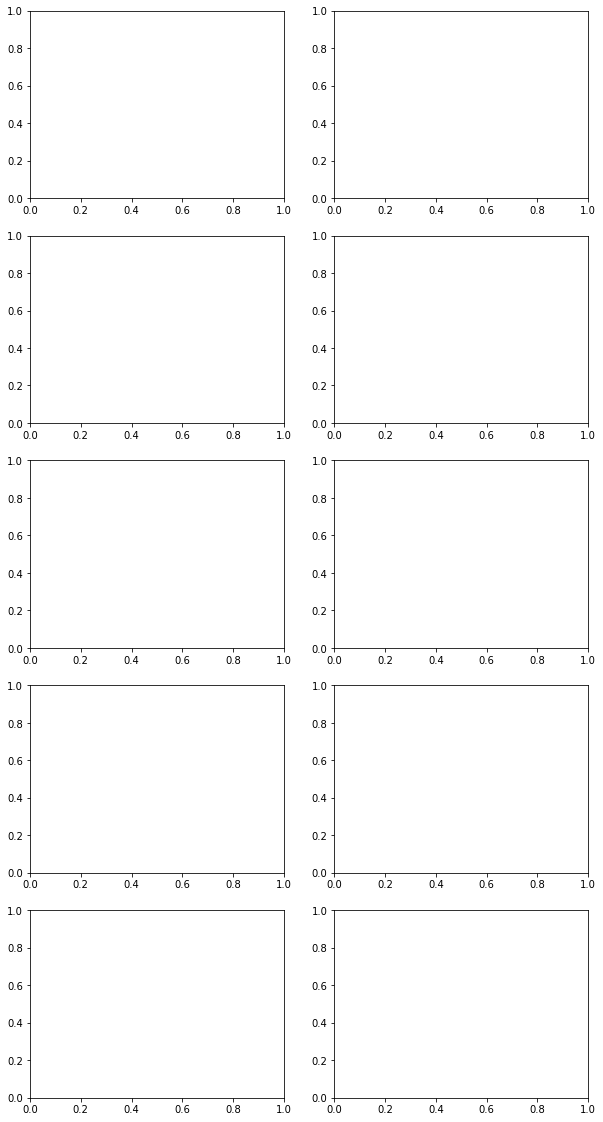

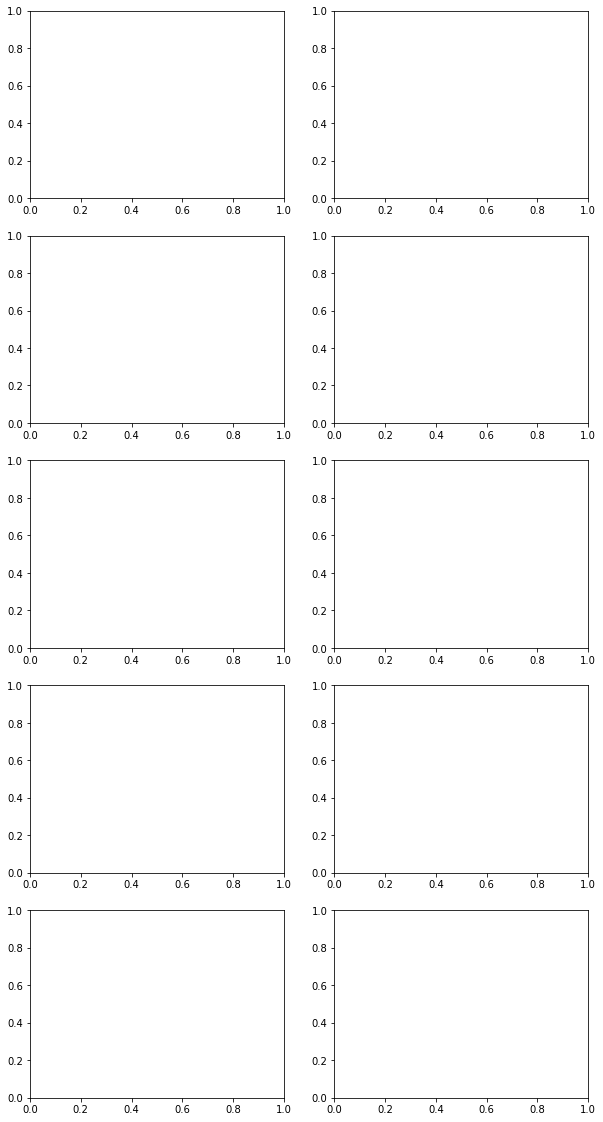

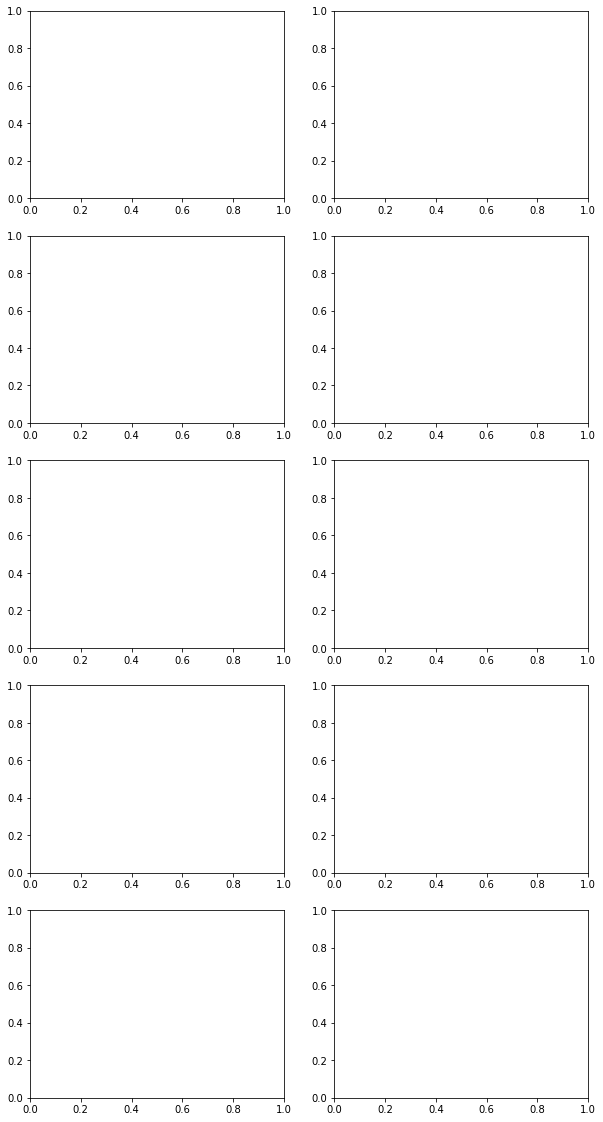

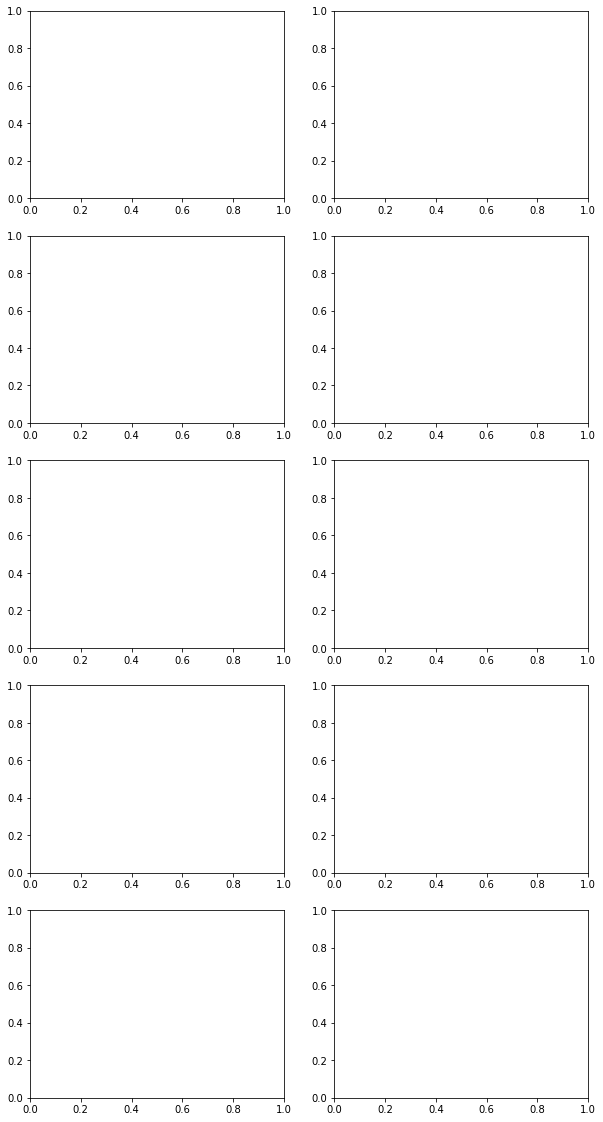

In [10]:
methods = ['lgb','LSTM','VAR','Kernel_RBF']

res_regre = []

for meth in methods:

    _, Val_pred, _ = pred_regression_methods(Data,dataset['data'],
                                    N_test=N_pred,
                                    method = meth,
                                    N_val = 10,
                                    pred_meth = 'rolling',
                                    p = 2,
                                    plot=False)
    res_regre.append(Val_pred)

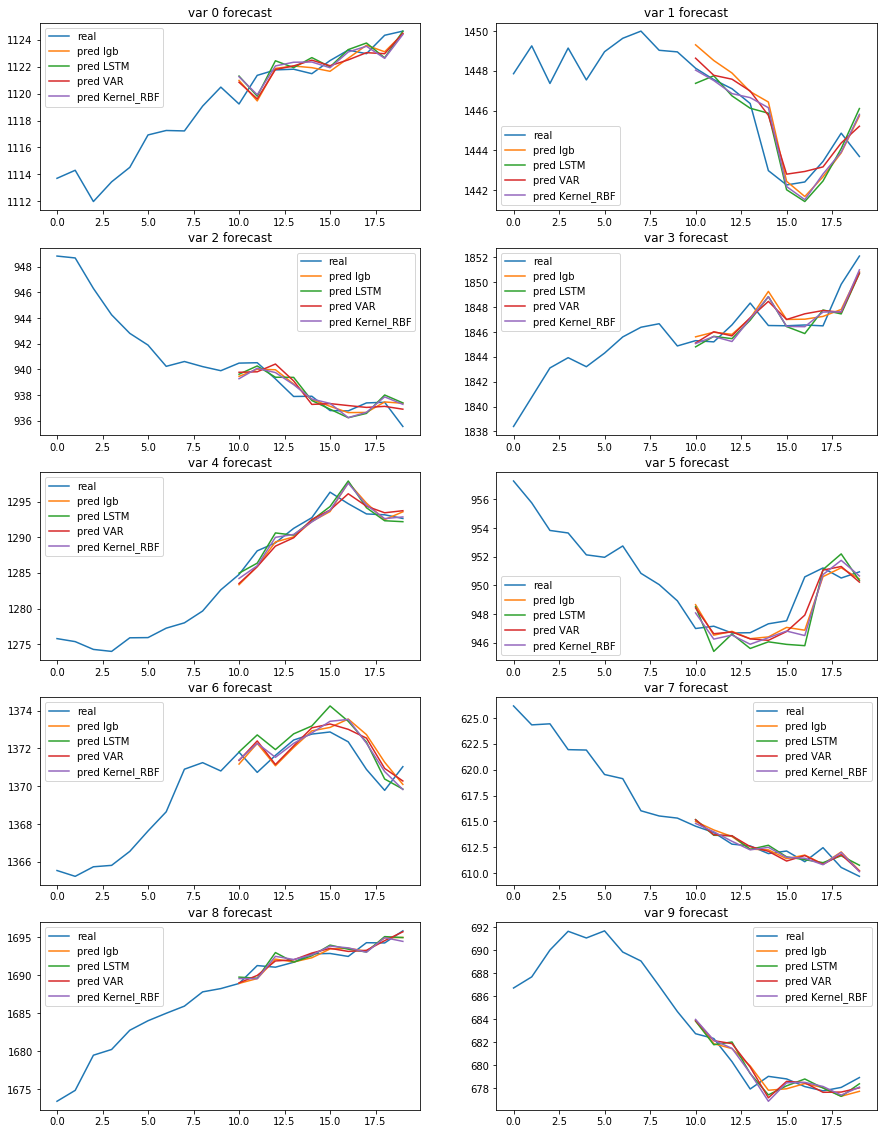

In [11]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)

N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))

for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')

        axes[i, j].legend()

In [12]:
# CV hmm_gmm 

hmm_gmm = HMM_GraphicalLasso(alpha=30,
                             n_clusters=N_states,
                             verbose=False,
                             mode='scaled',
                             warm_restart=True,
                             repetitions=5,
                             n_jobs=-1)

hmm_gmm.fit(dataset['data'])

print(hmm_gmm.lambdas)

print(results_recap(dataset['states'],hmm_gmm.labels_,dataset['thetas'],hmm_gmm.precisions_))

[0.21805888 0.12336437 0.13352583 0.11073569 0.24262144]
{'homogeneity [0, 1]': 0.8581421168980822, 'completeness [0, 1]': 0.8578267971670837, 'v_measure [0, 1]': 0.857984428061623, 'adjusted_mutual_info [0, 1]': 0.8572494409821148, 'weighted_mean_mcc [-1, 1]': (0.7532396954777505,), 'max_cluster_mean_mcc[-1,1]': (0.7883296176150548,), 'weighted_mean_f1 [0, 1]': (0.7342498245339893,), 'max_cluster_mean_f1[0,1]': (0.7584480431848852,), 'probabilities_clusters': (array([[0.8705036 , 0.01239669, 0.02212389, 0.0260223 , 0.        ],
       [0.0647482 , 0.00826446, 0.01327434, 0.95910781, 0.        ],
       [0.05035971, 0.01239669, 0.96460177, 0.        , 0.00806452],
       [0.01438849, 0.        , 0.        , 0.00743494, 0.98387097],
       [0.        , 0.96694215, 0.        , 0.00743494, 0.00806452]]),), 'max_probabilities_couples': ['Couple: (3, 4), Probability: 0.9838709677419355, MCC: 0.7337993857053429, F1_score: 0.7499999999999999', 'Couple: (4, 1), Probability: 0.9669421487603306,

100%|██████████| 1/1 [01:37<00:00, 97.75s/it]


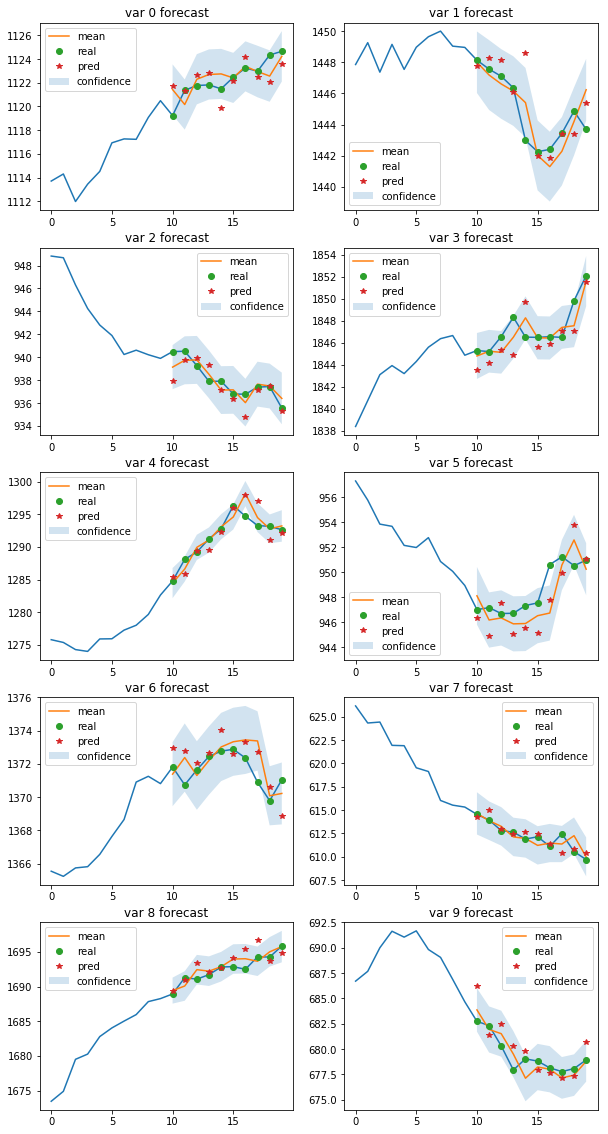

In [13]:
from regain.hmm.utils_pred import pred_HMM_GMM
returns = pred_HMM_GMM(dataset['data'],
                       Data,
                       [30],
                       [N_states],
                       N_test = N_pred,
                       meth = 'viterbi',
                       pred_meth = 'rolling',
                       recrossval = False)

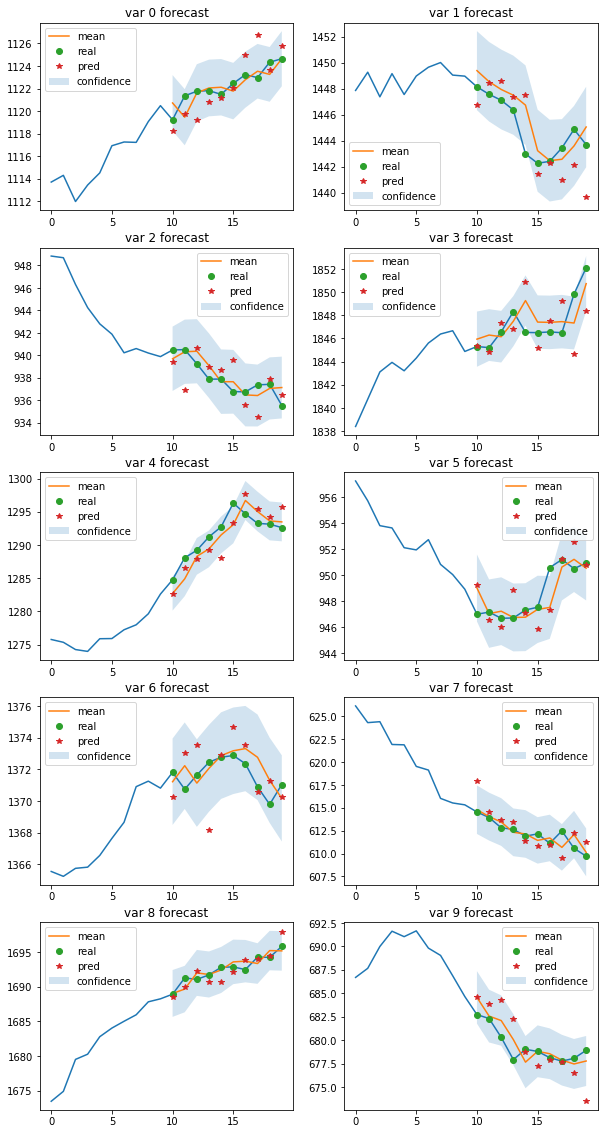

In [14]:
from regain.hmm.utils_pred import pred_from_N_past_days
res = pred_from_N_past_days(dataset['data'],Data,N_past_days=50,N_test=N_pred,pred_meth = 'rolling')

In [15]:
Value, Value_mean = Value_from_returns(Data, returns,10, pred_meth='rolling', perc_var=False)

In [16]:
Value_res, Value_mean_res = Value_from_returns(Data, res,10, pred_meth='rolling', perc_var=False)

In [17]:
res_regre.append(Value)
res_regre.append(Value_mean)
res_regre.append(Value_res)
res_regre.append(Value_mean_res)

In [18]:
methods.append('HMM-GMM')
methods.append('HMM-GMM mean')
methods.append('Last 50 days')
methods.append('Last 50 days mean')

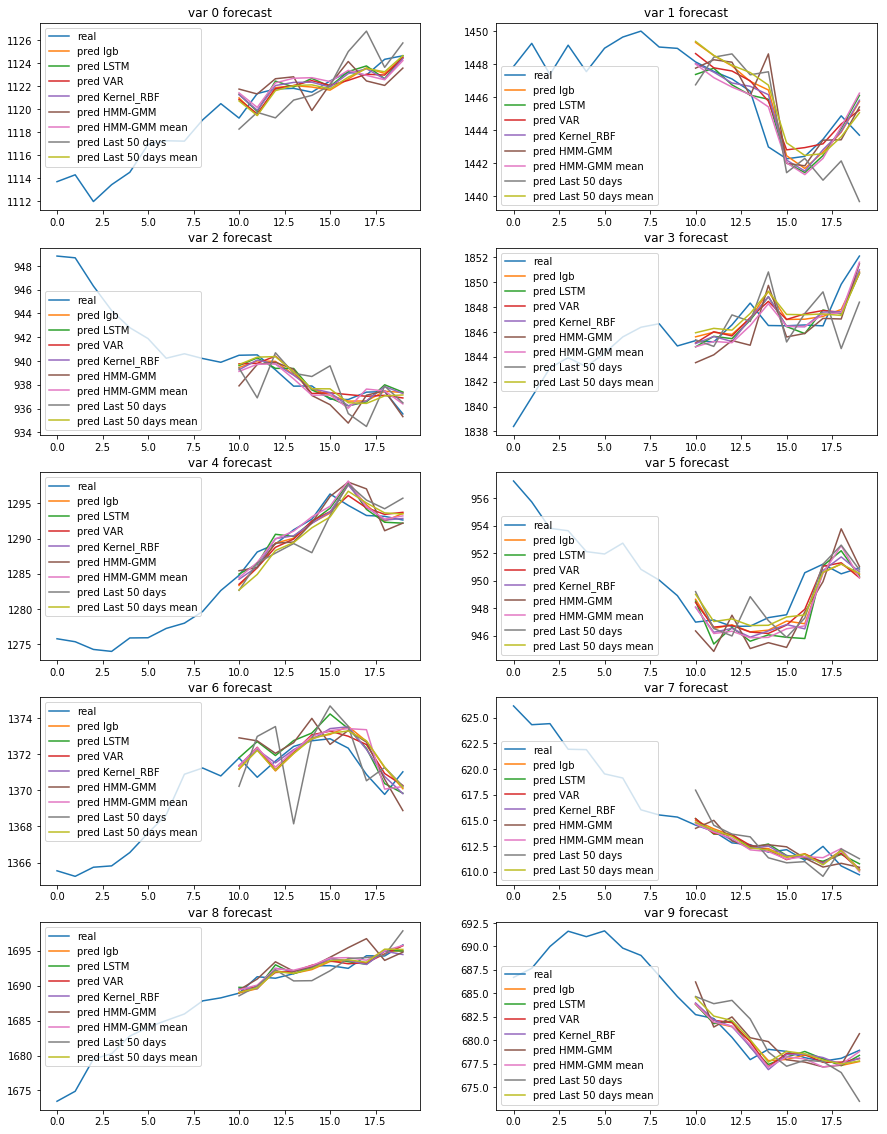

In [19]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)

N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))
list_all = []
for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):
        
        absolute_error = abs(Data[-(N_test):,ts]-Value_pred[:,ts])
        MAE = np.mean(absolute_error)
        std = np.std(absolute_error)
        

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
                list_all.append([str(methods[n]),'var ' + str(ts),MAE,std])
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')
                list_all.append([str(methods[n]),str(columns[ts]),MAE,std])

        axes[i, j].legend()

In [20]:
import pandas as pd
df_recap = pd.DataFrame(list_all, columns=['method', 'TS', 'MAE', 'std AB'])

In [21]:
print(df_recap.to_string())

               method     TS       MAE    std AB
0                 lgb  var 0  0.789142  0.603192
1                LSTM  var 0  0.859229  0.698058
2                 VAR  var 0  0.735407  0.624962
3          Kernel_RBF  var 0  0.832520  0.627680
4             HMM-GMM  var 0  1.107836  0.765408
5        HMM-GMM mean  var 0  0.847537  0.710211
6        Last 50 days  var 0  1.418242  1.022485
7   Last 50 days mean  var 0  0.718213  0.573835
8                 lgb  var 1  1.171155  0.885236
9                LSTM  var 1  0.984312  0.888969
10                VAR  var 1  0.797323  0.741914
11         Kernel_RBF  var 1  0.852969  0.976218
12            HMM-GMM  var 1  1.208079  1.563000
13       HMM-GMM mean  var 1  0.935302  0.845995
14       Last 50 days  var 1  1.952854  1.383916
15  Last 50 days mean  var 1  1.245193  0.904754
16                lgb  var 2  0.652161  0.504243
17               LSTM  var 2  0.693263  0.549736
18                VAR  var 2  0.740083  0.353868
19         Kernel_RB

In [22]:
prec_real = {}

for i,k in enumerate(dataset['states'][-N_pred:]):
    prec_real[str(i)] = dataset['thetas'][k]

In [23]:
mcc, f1 = thetas_comparison(prec_real,returns[3])

0.7953949089757174
0.8386278693775346
0.8386278693775346
0.8386278693775346
0.7953949089757174
0.7953949089757174
-0.07354355067681902
0.42947784519366666
0.42947784519366666
1.0


In [24]:
print('mean MCC precision matrix forecast', mcc,'mean F1 precision matrix forecast', f1)

mean MCC precision matrix forecast 0.668748047477027 mean F1 precision matrix  forecast 0.701392360499912


In [25]:
mcc_last, f1_last = thetas_comparison(prec_real,res[3])

0.1091089451179962
0.1091089451179962
0.1322711693170675
0.07142857142857142
0.15537971921347118
0.1959983830200101
-0.20890725544918334
-0.13497638119975428
0.1392715036327889
0.09600307214746387


In [26]:
print('mean MCC precision matrix forecast', mcc_last,'mean F1 precision matrix  forecast', f1_last )

mean MCC precision matrix forecast 0.06646866723464277 mean F1 precision matrix  forecast 0.35151515151515156
